# **Regression – Prediction of Grocery Sales**
- **Author:** Yvon Bilodeau
- **Last updated:** August 2022
---

## **Project Desciption**

### **Overview**

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

Using this model, BigMart will try to understand the properties of products and outlets which play a key role in increasing sales.

### **Data Source**



The data was sourced from [analyticsvidhya.com](https://datahack.analyticsvidhya.com/contest/practice-problem-big-mart-sales-iii/)

There are 8523 rows, and 12 columns.
The rows represent 8523 observations, and the columns represent 11 features and 1 target variable.

### **Data Dictionary**


- **Item_Identifier:** Unique product ID
- **Item_Weight Weight:** of product
- **Item_Fat_Content:** Whether the product is low fat or regular
- **Item_Visibility:** The percentage of total display area of all products in store allocated to the particular product
- **Item_Type:** The category to which the product belongs
- **Item_MRP:** Maximum Retail Price (list price) of the product
- **Outlet_Identifier:** Unique store ID
- **Outlet_Establishment_Year:** The year in which store was established
- **Outlet_Size:** The size of the store in terms of ground area covered
- **Outlet_Location_Type:** The type of area in which the store is located
- **Outlet_Type:** Whether the outlet is a grocery store or some sort of supermarket
- **Item_Outlet_Sales:** Sales of the product in the particular store. This is the target variable to be predicted.

## **Import Libraries | Load the Dataset**

### **Import Libraries**

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns

import missingno as msno

# StatsModels
import statsmodels.api as sm

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Dummy Regression
from sklearn.dummy import DummyRegressor
# Linear Regression
from sklearn.linear_model import LinearRegression
# Lasso Regression
from sklearn.linear_model import Lasso
# Ridge Regression
from sklearn.linear_model import Ridge
# Elastic Net Regression
from sklearn.linear_model import ElasticNet
# Decision Trees
from sklearn.tree import DecisionTreeRegressor
# Bagged Trees
from sklearn.ensemble import BaggingRegressor
# Suport Vector Regression
from sklearn.svm import LinearSVR
# K Neighbors Regression
from sklearn.neighbors import KNeighborsRegressor
# Random Forests
from sklearn.ensemble import RandomForestRegressor
# Gradient Boost
from sklearn.ensemble import GradientBoostingRegressor
# Light Gradient Boost
from lightgbm import LGBMRegressor
# XGBoost - eXtreme Gradient Boost
from xgboost import XGBRegressor

# Import GridSearch for Model Hypertuning
from sklearn.model_selection import GridSearchCV

# Regression Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Set global scikit-learn configuration 
from sklearn import set_config
# Display estimators as a diagram in a Jupyter lab or notebook context
set_config(display=None) # {‘text’, ‘diagram’}, default=None

# Calculate the correlation/strength-of-association of features
# in a data-set with 
# ! pip install dython
from dython.nominal import associations

In [2]:
# Set display options
# Display all columns
pd.set_option('display.max_column', None)
# Display full width of field
pd.set_option('display.max_colwidth', None)
# Display table across entire available view
pd.set_option('display.width', -1)
# Display all rows
pd.set_option('display.max_rows', None)

### **Load the Dataset**

In [3]:
# Load the dataset
url = 'https://raw.githubusercontent.com/YBilodeau/Regression---Prediction-of-Grocery-Sales/main/Data/Grocery_Sales.csv'
df = pd.read_csv(url)

In [4]:
# Create versions of the dataset to prevent data leakage
eda_df = df.copy()
ml_df = df.copy()

## **Inspect the Data**

### **Display the Row and Column Count**

In [5]:
# Display the number of rows and columns for the dataframe
df.shape
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 8523 rows, and 12 columns.
The rows represent 8523 observations, and the columns represent 11 features and 1 target variable.


### **Display Data Types**

In [6]:
# Display the column names and datatypes for each column
# Columns with mixed datatypes are identified as an object datatype
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### **Display Column Names, Count of Non-Null Values, and Data Types**

In [7]:
# Display the column names, count of non-null values, and their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


## **Clean the Data**

### **Display First (5) Rows**

In [8]:
# Display the first (5) rows of the dataframe
df.head().style.format({ "Item_MRP":          "${:,.2f}",
                         "Item_Outlet_Sales": "${:,.2f}",
                         "Item_Visibility":    "{:.2%}",
                         "Item_Weight":        "{:.6}"})

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,1.60%,Dairy,$249.81,OUT049,1999,Medium,Tier 1,Supermarket Type1,"$3,735.14"
1,DRC01,5.92,Regular,1.93%,Soft Drinks,$48.27,OUT018,2009,Medium,Tier 3,Supermarket Type2,$443.42
2,FDN15,17.5,Low Fat,1.68%,Meat,$141.62,OUT049,1999,Medium,Tier 1,Supermarket Type1,"$2,097.27"
3,FDX07,19.2,Regular,0.00%,Fruits and Vegetables,$182.09,OUT010,1998,nan,Tier 3,Grocery Store,$732.38
4,NCD19,8.93,Low Fat,0.00%,Household,$53.86,OUT013,1987,High,Tier 3,Supermarket Type1,$994.71


- The data appears to have loaded correctly.

### **Display the Descriptive Statistics**

In [9]:
# Display the descriptive statistics for the numeric columns
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
# Display the descriptive statistics for the non-numeric columns
df.describe(exclude="number")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


### **Remove Unnecessary Columns**

#### **'Item_Identifier' column**

In [11]:
# Calculate the count of unique values and the cardinality for this column
unique_values = df.Item_Identifier.nunique()
# Display the count of unique values and the cardinality for this column
print(f'This column has {unique_values} unique values.')

This column has 1559 unique values.


- The high cardinality of this object column feature may adversely impact machine learning model prediction performance and processing times, as well as  exaggerate it's feature importance.
- For EDA purposes, this feature may be retained.
- For Machine Learning, this feature may be dropped.

### **Remove Unecessary Rows**

In [12]:
# Display the number of duplicate rows in the dataset
print(f'There are {df.duplicated().sum()} duplicate rows.')

There are 0 duplicate rows.


- No duplicates were found or dropped.

### **Missing Values**

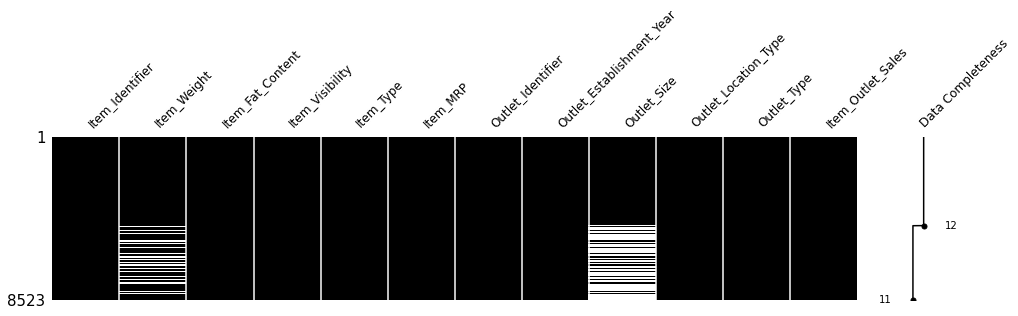

In [13]:
# Display missing values by column
msno.matrix(df, figsize=(16,3), labels=True, 
            fontsize=12, sort="descending", color=(0,0,0));

In [14]:
# Display the count of missing values by column
print(df.isna().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [15]:
# Display the percentage of missing values by column
print(df.isna().sum()/len(df)*100)

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64


#### **'Item Weight' column**


- 'Item_Weight' has 1643 (17.16%) missing values.
- All identical 'Item_Identifier's should have the same 'Item_Weight'. The missing values can be imputed from other 'Item_Identifier's that have the same value.
- For EDA, the eda_df can apply this step now.
- For Machine Learning, the ml_df will perform this step after the train_test_splt utilizing 'Item_Identifier's from the Train dataset only to prevent data leakage.

In [16]:
# Loop through index values of the dataframe
for ind in eda_df.index:
    # Create a filter to select the Item_Identifier corresponding to the index
    item_filter = eda_df['Item_Identifier'] == eda_df.loc[ind,'Item_Identifier']

    # Calculate the rounded value of the mean 'Item_Weight' of this rows 'Item_Identifier' 
    mean_item_weight = round(eda_df.loc[item_filter,'Item_Weight'].mean(), 3)

    # Assign mean_item_weight to the 'Item_Weight' column of this row
    eda_df.loc[ind,'Item_Weight'] = mean_item_weight
    
    #print(ind, df['Item_Identifier'][ind], df['Item_Weight'][ind], item_weight, "\n")

In [17]:
# Identify any remaining 'Item_Identifier's without 'Item_Weight' for the eda_df
print(eda_df.Item_Weight.isnull().sum())
eda_df[eda_df.Item_Weight.isnull()]

4


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


- For EDA, the eda_df the remaining (4) values can be imputed from the median value of the column.

- For Machine Learning, the ml_df the remaining (4) values can be imputed using SimpleImputer(strategy='median') during preprocessing, but after the train_test_split in order to avoid data leakage.

In [18]:
median_item_weight = eda_df['Item_Weight'].median()
eda_df['Item_Weight'].fillna(median_item_weight, inplace=True)

In [19]:
# Confirm there are no remaining 'Item_Identifier's without 'Item_Weight' for the eda_df
print(eda_df.Item_Weight.isnull().sum())

0


#### **'Outlet_Size' column**
- 'Outlet_Size' has 2410 missing values out of 8523 rows, which is significant (28%).

In [20]:
# Display the unique values for the column
print(df['Outlet_Size'].unique())

['Medium' nan 'High' 'Small']


In [21]:
# Group the unique values by 'Outlet_Type' and 'Outlet_Location_Type'
df.groupby(['Outlet_Type','Outlet_Location_Type'])['Outlet_Size'].unique()

Outlet_Type        Outlet_Location_Type
Grocery Store      Tier 1                          [Small]
                   Tier 3                            [nan]
Supermarket Type1  Tier 1                  [Medium, Small]
                   Tier 2                     [nan, Small]
                   Tier 3                           [High]
Supermarket Type2  Tier 3                         [Medium]
Supermarket Type3  Tier 3                         [Medium]
Name: Outlet_Size, dtype: object

- It does not appear that we can impute 'Outlet_Size' from 'Outlet_Type' and/or 'Outlet_Location_Type'.
- Missing values will be replaced with 'Unknown' for this Object Data Type.

In [22]:
# Replace missing values with 'Unknown'
df.Outlet_Size.fillna('Unknown',inplace=True)
eda_df.Outlet_Size.fillna('Unknown',inplace=True)
ml_df.Outlet_Size.fillna('Unknown',inplace=True)

In [23]:
# Confirm missing values have been replaced
print(df['Outlet_Size'].unique())
print(eda_df['Outlet_Size'].unique())
print(ml_df['Outlet_Size'].unique())

['Medium' 'Unknown' 'High' 'Small']
['Medium' 'Unknown' 'High' 'Small']
['Medium' 'Unknown' 'High' 'Small']


### **Inspect Column Datatypes for Errors**

Ensure all columns match the data types listed in the data dictionary.

In [24]:
 # Display column names and datatypes
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [25]:
# Display first (5) rows
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Unknown,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


- All columns match their datatypes.

### **Inspect Column Names for Errors**

- Check for common syntax errors which may include extra white spaces at the beginning or end of strings or column names.

- Check for typos or inconsistencies in strings that need to be fixed.(example: cat, Cat, cats)

In [26]:
# Display column names
df.columns

Index(['Item_Identifier',
       'Item_Weight',
       'Item_Fat_Content',
       'Item_Visibility',
       'Item_Type',
       'Item_MRP',
       'Outlet_Identifier',
       'Outlet_Establishment_Year',
       'Outlet_Size',
       'Outlet_Location_Type',
       'Outlet_Type',
       'Item_Outlet_Sales'],
      dtype='object')

- No issues with column names noted.

### **Inspect Column Values for Errors**

#### **Object Datatypes**

- Check for common syntax errors which may include extra white spaces at the beginning or end of strings or column names.

- Check for typos or inconsistencies in strings that need to be fixed.

In [27]:
# Display the descriptive statistics for the non-numeric columns
df.describe(exclude="number")

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,5,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


In [28]:
# Create a series of the datatypes
data_types = df.dtypes
# Create a filter to select only the object datatypes
object_data_types = data_types[(data_types == "object")]
# Display the series of object datatypes
object_data_types

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

##### **'Item_Identifier' column**

In [29]:
# Display the unique values from the column
print(df['Item_Identifier'].unique())

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']


- This column has 1559 unique values, which is too many to 
display.

##### **'Item_Fat_Content' column**

In [30]:
# Display the unique values from the column
print(df['Item_Fat_Content'].unique())

['Low Fat' 'Regular' 'low fat' 'LF' 'reg']


In [31]:
df.groupby(['Item_Fat_Content'])['Item_Fat_Content'].count()

Item_Fat_Content
LF          316
Low Fat    5089
Regular    2889
low fat     112
reg         117
Name: Item_Fat_Content, dtype: int64

The values can be standardized to 'Low Fat' and 'Regular'.
- Replace 'low fat' and 'LF' with 'Low Fat'.
- Replace 'reg' with 'Regular'.

In [32]:
# Define a dictionary with key/value pairs
dict = {"low fat": 'Low Fat', "reg": 'Regular', "LF": 'Low Fat'}

In [33]:
# Replace values using dictionary
eda_df.replace({'Item_Fat_Content': dict}, inplace = True)
ml_df.replace({'Item_Fat_Content': dict}, inplace = True)

In [34]:
# Display unique values to confirm they have been updated
print(eda_df['Item_Fat_Content'].unique())
print(ml_df['Item_Fat_Content'].unique())

['Low Fat' 'Regular']
['Low Fat' 'Regular']


- Replacement values confirmed.

##### **'Item_Type' column**

In [35]:
# Display the unique values from the column
print(df['Item_Type'].unique())

['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']


In [36]:
df.groupby(['Item_Type'])['Item_Type'].count()

Item_Type
Baking Goods              648
Breads                    251
Breakfast                 110
Canned                    649
Dairy                     682
Frozen Foods              856
Fruits and Vegetables    1232
Hard Drinks               214
Health and Hygiene        520
Household                 910
Meat                      425
Others                    169
Seafood                    64
Snack Foods              1200
Soft Drinks               445
Starchy Foods             148
Name: Item_Type, dtype: int64

- No issues noted.

##### **'Outlet_Identifier' column**

In [37]:
# Display the unique values from the column
print(df['Outlet_Identifier'].unique())

['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']


In [38]:
df.groupby(['Outlet_Identifier'])['Outlet_Identifier'].count()

Outlet_Identifier
OUT010    555
OUT013    932
OUT017    926
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045    929
OUT046    930
OUT049    930
Name: Outlet_Identifier, dtype: int64

- No issues noted.

##### **'Outlet_Size' column**

In [39]:
# Display the unique values from the column
print(df['Outlet_Size'].unique())

['Medium' 'Unknown' 'High' 'Small']


In [40]:
df.groupby(['Outlet_Size'])['Outlet_Size'].count()

Outlet_Size
High        932
Medium     2793
Small      2388
Unknown    2410
Name: Outlet_Size, dtype: int64

- No issues noted.

##### **'Outlet_Location_Type' column**

In [41]:
# Display the unique values from the column
print(df['Outlet_Location_Type'].unique())

['Tier 1' 'Tier 3' 'Tier 2']


In [42]:
df.groupby(['Outlet_Location_Type'])['Outlet_Location_Type'].count()

Outlet_Location_Type
Tier 1    2388
Tier 2    2785
Tier 3    3350
Name: Outlet_Location_Type, dtype: int64

- No issues noted.

##### **'Outlet_Type' column**

In [43]:
# Display the unique values from the column
print(df['Outlet_Type'].unique())

['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


In [44]:
df.groupby(['Outlet_Type'])['Outlet_Type'].count()

Outlet_Type
Grocery Store        1083
Supermarket Type1    5577
Supermarket Type2     928
Supermarket Type3     935
Name: Outlet_Type, dtype: int64

- No issues noted.

#### **Numerical Datatypes**

In [45]:
# Display the descriptive statistics for the numeric columns
df.describe().round(3)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000,8523.000,8523.000,8523.000,8523.000
mean,12.858,0.066,140.993,1997.832,2181.289
std,4.643,0.052,62.275,8.372,1706.500
min,4.555,0.000,31.290,1985.000,33.290
25%,8.774,0.027,93.826,1987.000,834.247
50%,12.600,0.054,143.013,1999.000,1794.331
75%,16.850,0.095,185.644,2004.000,3101.296
max,21.350,0.328,266.888,2009.000,13086.965


- **'Item_Weight'** -
No unusual statistics were noted.
- **'Item_Visibility'** - 
The percentage of total display area of all products in a store allocated to the particular product appears to have an extreme range. (Minimum value of 0.000 and a Maximum value of 0.328)
- **'Item_MRP'** -
No unusual statistics were noted.
- **'Outlet_Establishment_Year'** -
No unusual statistics were noted.
- **'Item_Outlet_Sales'** -
No unusual statistics were noted.


## **Exploratory Data Analysis**

#### **Functions**

##### **Statistics Function**

In [46]:
# Create a function to display supplemental statistics 
def column_statistics(df, column_name, max_unique_values_to_disply=20):
    # Display the count of missing values for this column
    print(f'Missing Values: {df[column_name].isna().sum()} ({round((df[column_name].isna().sum())/(df.shape[0])*100,1)})%')

    # Determine Outliers - Only if this is a numeric column
    if (df[column_name].dtype == 'int64') | (df[column_name].dtype == 'float64'):
        # Create outlier filters
        q1 = df[column_name].quantile(0.25) # 25th percentile
        q3 = df[column_name].quantile(0.75) # 75th percentile
        iqr = q3 - q1 # Interquartile range
        low_limit = q1 - (1.5 * iqr) # low limit
        high_limit = q3 + (1.5 * iqr) # high limit
        # Create outlier dataframes
        low_df = df[(df[column_name] < low_limit)]
        high_df = df[(df[column_name] > high_limit)]
        # Calculate the outlier counts and percentages
        low_oulier_count = low_df.shape[0]
        low_outlier_percentge = round(((low_oulier_count)/(df.shape[0])*100),1)
        high_oulier_count = high_df.shape[0]
        high_outlier_percentge = round(((high_oulier_count)/(df.shape[0])*100),1)
        # Display the outlier counts.
        print(f'Outliers: {low_oulier_count} ({low_outlier_percentge})% low, {high_oulier_count} ({high_outlier_percentge})% high')
        
    # Display the count of unique values for this column
    print(f'Unique values: {df[column_name].nunique()}')

    # Display the unique values including Nan and their counts for this column,
    # if the number of unique values is below the function parameter
    if df[column_name].nunique() < max_unique_values_to_disply:
        print(df[column_name].value_counts(dropna=False))

##### **Function to Display Histogram**

In [47]:
# Create a function to create a Histogram
def hist_plot(df, column_name, unit_of_measure, bin_count):
    feature = df[column_name]
    mean = feature.mean()
    median = feature.median()

    fig, ax = plt.subplots(nrows=1, figsize=(8,4), facecolor='w')
    plt.title(column_name, fontsize = 22, weight='bold')
    
    sns.histplot(data=df, x=column_name, color='#069AF3', 
                 linewidth=2, bins=bin_count)
    
    plt.xlabel(unit_of_measure, fontsize = 16, weight='bold')
    plt.xticks(weight='bold')
    
    ax.set_ylabel('Instances',fontweight='bold',fontsize=14)
    
    ax.set_facecolor('lightblue')
    ax.tick_params(labelcolor='k', labelsize=10)
    # ax.set_yticklabels(ax.get_yticks(), weight='bold')
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)

    ax.axvline(mean, color = 'magenta', linewidth=2, label=f'Mean = {mean:,.2f}')
    ax.axvline(median, ls='dotted', color = 'darkmagenta',  linewidth=2, label=f'Median = {median:,.2f}')
    ax.legend();
    plt.tight_layout()
    plt.show;

##### **Function to Display a KDE Plot**

In [48]:
# Create a function to create a KDE Plot
def kde_plot(df, column_name, unit_of_measure, bin_count):
    feature = df[column_name]
    mean = feature.mean()
    median = feature.median()

    fig, ax = plt.subplots(nrows=1, figsize=(8,4), facecolor='w')
    plt.title(column_name, fontsize = 22, weight='bold')
    sns.kdeplot(data=df, x=column_name, color='#069AF3', 
                 linewidth=2, fill=True)
    plt.xlabel(unit_of_measure, fontsize = 16, weight='bold')
    plt.xticks(weight='bold')
    ax.set_ylabel('Density',fontweight='bold',fontsize=14)
    ax.set_facecolor('lightblue')
    ax.tick_params(labelcolor='k', labelsize=10)
    #ax.set_yticklabels(ax.get_yticks(), weight='bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)

    ax.axvline(mean, color = 'magenta', linewidth=2, label=f'Mean = {mean:,.2f}')
    ax.axvline(median, ls='dotted', color = 'darkmagenta',  linewidth=2, label=f'Median = {median:,.2f}')

    ax.legend()
    format = StrMethodFormatter('{x:.5f}') 
    ax.yaxis.set_major_formatter(format);
    plt.tight_layout()
    plt.show;

##### **Function to Display a Boxplot**

In [49]:
# Create a function to create a Boxplot
def box_plot(df, column_name, unit_of_measure, fs=(8,4) ):
    fig, ax = plt.subplots(nrows=1, figsize=fs, facecolor='w')
    plt.title(column_name, fontsize = 22, weight='bold')
    sns.boxplot(data=df, x=column_name, width=.5, color='#069AF3', ax=ax,
                medianprops={'color':'k', 'linewidth':2},
                whiskerprops={'color':'k', 'linewidth':2},
                boxprops={'facecolor':'#069AF3', 
                          'edgecolor':'k', 'linewidth':2},
                capprops={'color':'k', 'linewidth':3},
                flierprops={'marker':'o', 'markersize':8, 
                            'markerfacecolor':'#069AF3', 
                            'markeredgecolor':'k'}); 
    plt.xlabel(unit_of_measure, fontsize = 16, weight='bold')
    plt.xticks(weight='bold')
    ax.set_facecolor('lightblue')
    ax.tick_params(labelcolor='k', labelsize=10)
    #ax.set_yticklabels(ax.get_yticks(), weight='bold')
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)

    plt.tight_layout()
    plt.show;

##### **Function to Display Countplot**

In [50]:
# Create a function to create a Count Plot
def count_plot(df, column_name, label_order, rot=0, fs=(8,4), hza='center'):
    fig, ax = plt.subplots(nrows=1, figsize=fs, facecolor='w')
    plt.title(column_name, fontsize = 22, weight='bold')
    
    sns.countplot(data=df, x=column_name, lw=3, ec='k', 
                  color='#069AF3', order=label_order)
    plt.xlabel('')
    plt.xticks(weight='bold', rotation=rot, ha=hza)
    
    ax.set_ylabel('Instances', fontweight='bold', fontsize=18)
    
    ax.set_facecolor('lightblue')
    ax.tick_params(labelcolor='k', labelsize=12)
    
    #ax.set_yticklabels(ax.get_yticks(), weight='bold')
    
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)
        
    plt.tight_layout()
    plt.show;

##### **Function to Display Scatter Plot**

In [51]:
# Create a function to create a Scatter Plot
def scatter_plot(df, x, y, tit_lab='', x_lab='', y_lab=''):
    palette_dict = {0: 'indigo' , 1: 'magenta'}
    fig, ax = plt.subplots(figsize=(8,4), facecolor='w');
    sns.scatterplot(x=df[x], y=df[y]);
    # Regression Line
    m, b, *_ = stats.linregress(df[x], df[y])
    #ax.plt(xy1=(0,b), slope=m, label=f'$y = {m:.1f}x  {b:+.f}$')
    # Labels
    plt.title(tit_lab, fontsize = 22, weight='bold')
    plt.xlabel(x_lab, fontsize = 14, weight='bold')
    plt.ylabel(y_lab, fontsize = 14, weight='bold');
    # Ticks
    plt.xticks(fontsize = 10, weight='bold')
    plt.yticks(fontsize = 10, weight='bold');
    # Face 
    ax.set_facecolor('lightblue')
    # Axes
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)
    #plt.legend(bbox_to_anchor=(1.23, 1))
    
    format = StrMethodFormatter('${x:,.2f}') 
    ax.yaxis.set_major_formatter(format);


    plt.tight_layout()
    plt.show;

##### **Function to Display Reg Plot**

In [52]:
# Create a function to create a Reg Plot
def reg_plot(df, x, y, tit_lab='', x_lab='', y_lab=''):
    palette_dict = {0: 'indigo' , 1: 'magenta'}
    fig, ax = plt.subplots(figsize=(8,4), facecolor='w');
    sns.scatterplot(x=df[x], y=df[y]);
    sns.regplot(data=df, x=x,y=y,
                line_kws={'color':'black'},
                scatter_kws={'s':1}); 
    # Regression Line
    m, b, *_ = stats.linregress(df[x], df[y])
    #ax.plt(xy1=(0,b), slope=m, label=f'$y = {m:.1f}x  {b:+.f}$')
    # Labels
    plt.title(tit_lab, fontsize = 22, weight='bold')
    plt.xlabel(x_lab, fontsize = 14, weight='bold')
    plt.ylabel(y_lab, fontsize = 14, weight='bold');
    # Ticks
    plt.xticks(fontsize = 10, weight='bold')
    plt.yticks(fontsize = 10, weight='bold');
    # Face 
    ax.set_facecolor('lightblue')
    # Axes
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)
    #plt.legend(bbox_to_anchor=(1.23, 1))
    
    format = StrMethodFormatter('${x:,.0f}') 
    ax.yaxis.set_major_formatter(format);

    
    plt.tight_layout()
    plt.show;

##### **Function to Display Reg Plot - Version 2**

In [53]:
# Create a function to create a Reg Plot
# Version 2 will distinguish 'Outlet_Location_Type'
def reg_2_plot(df, x, y, tit_lab='', x_lab='', y_lab=''):
    palette_dict = {0: 'indigo' , 1: 'magenta'}
    fig, ax = plt.subplots(figsize=(8,4), facecolor='w');
    sns.scatterplot(data=df, x=df[x], y=df[y], hue='Outlet_Type', alpha=.8);
    sns.regplot(data=df, x=x,y=y,
                line_kws={'color':'black', 'lw':3},
                scatter_kws={'s':1}); 
    
    sns.regplot(data=df[df['Outlet_Type'] == 'Grocery Store'], 
                x='Item_Visibility', y='Item_Outlet_Sales', 
                scatter_kws={'s':0},
                line_kws={'color':'green', 'lw':3})
    sns.regplot(data=df[df['Outlet_Type'] == 'Supermarket Type1'], 
                x = 'Item_Visibility', y = 'Item_Outlet_Sales', 
                scatter_kws={'s':0}, 
                line_kws={'color': "blue", 'lw':3})
    sns.regplot(data=df[df['Outlet_Type'] == 'Supermarket Type2'], 
                x = 'Item_Visibility', y = 'Item_Outlet_Sales', 
                scatter_kws={'s':0}, 
                line_kws={'color': "orange", 'lw':3})
    sns.regplot(data=df[df['Outlet_Type'] == 'Supermarket Type3'], 
                x = 'Item_Visibility', y = 'Item_Outlet_Sales', 
                scatter_kws={'s':0}, 
                line_kws={'color': "red", 'lw':3})

    # Regression Line
    m, b, *_ = stats.linregress(df[x], df[y])
    #ax.plt(xy1=(0,b), slope=m, label=f'$y = {m:.1f}x  {b:+.f}$')
    # Labels
    plt.title(tit_lab, fontsize = 22, weight='bold')
    plt.xlabel(x_lab, fontsize = 14, weight='bold')
    plt.ylabel(y_lab, fontsize = 14, weight='bold');
    # Ticks
    plt.xticks(fontsize = 10, weight='bold')
    plt.yticks(fontsize = 10, weight='bold');
    # Face 
    ax.set_facecolor('lightblue')
    # Axes
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(3)
    #plt.legend(bbox_to_anchor=(1.23, 1))
    
    format = StrMethodFormatter('${x:,.0f}') 
    ax.yaxis.set_major_formatter(format);

    
    plt.tight_layout()
    plt.show;

##### **Function to Display Skew**

In [54]:
# Creates a function to determine skew
def skew_function(df, column_name):
    feature = df[column_name]
    mean = feature.mean()
    median = feature.median()
    if median < mean:
        print('This feature is positively skewed.')
    else:
        print('This feature is negatively skewed.')

##### **Function to Display Kurtosis**

In [55]:
# Creates a function to determine kurtosis
def kurtosis_function(df, column_name):
    kurt = stats.kurtosis(df[column_name], fisher = False)
    if kurt > 3:
        print(f'This feature is Leptokurtic, because it has kurtosis value of {kurt}')
        if kurt < 3.5:
             print(f'Though we could say it is Mesokurtic, as the value is close to 3.')       
    elif kurt < 3:
        print(f'This feature is Platykurtic, because it has kurtosis value of {kurt}.')
        if kurt > 2.5:
             print(f'Though we could say it is Mesokurtic, as the value is close to 3.')       
    else:
        print(f'This feature is Mesokurtic, because it has kurtosis value of {kurt}.') 

In [56]:
# Creates a function to determine the number of outliers based on z-score
def outlier_function(df, column_name):
    outliers = np.abs(stats.zscore(df[column_name])) > 3
    print(f'This feature has {outliers.sum()} outliers.')

##### **Function to Describe Distribution**

In [57]:
# Determine if this feature has skew, and if so, which direction (+/-)
# Determine the kurtosis of the feature; Mesokurtic, Leptokurtic, or Platykurtic
# Determine the number of outliers for this feature based on zscore
def dist_desc(df, column_name):
    skew_function(df, column_name)
    kurtosis_function(df, column_name)
    outlier_function(df, column_name)

### **Categorical Columns**

#### **Summary Statistics**

In [58]:
# Display the descriptive statistics for the non-numeric columns
eda_df.describe(exclude=('number'))

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,8523,8523,8523
unique,1559,2,16,10,4,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5517,1232,935,2793,3350,5577


#### **'Item_Identifier' column**

In [59]:
# Display column statistics
eda_df.Item_Identifier.describe()

count      8523
unique     1559
top       FDW13
freq         10
Name: Item_Identifier, dtype: object

In [60]:
# Display supplemental column statistics
column_statistics(eda_df, 'Item_Identifier')

Missing Values: 0 (0.0)%
Unique values: 1559


In [61]:
# Display normalzed value counts
eda_df['Item_Identifier'].value_counts(normalize=True).head()

FDW13    0.001173
FDG33    0.001173
NCY18    0.001056
FDD38    0.001056
DRE49    0.001056
Name: Item_Identifier, dtype: float64

- There are 1559 unique values.

#### **'Item_Fat_Content' column**

In [62]:
# Display column statistics
df.Item_Fat_Content.describe()

count        8523
unique          5
top       Low Fat
freq         5089
Name: Item_Fat_Content, dtype: object

In [63]:
# Display supplemental column statistics
column_statistics(eda_df, 'Item_Fat_Content')

Missing Values: 0 (0.0)%
Unique values: 2
Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64


In [64]:
# Display normalzed value counts
eda_df['Item_Fat_Content'].value_counts(normalize=True)

Low Fat    0.647307
Regular    0.352693
Name: Item_Fat_Content, dtype: float64

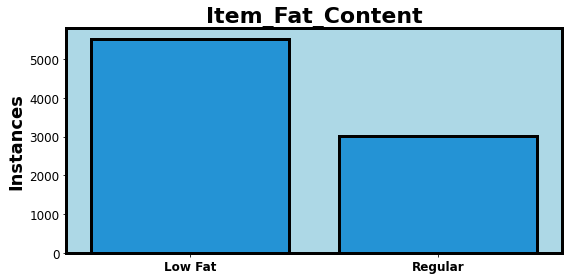

In [65]:
# Utilize function to display count plot
count_plot(eda_df, 'Item_Fat_Content', ['Low Fat', 'Regular'], rot=0)

#### **'Item_Type' column**

In [66]:
# Display column statistics
eda_df.Item_Type.describe()

count                      8523
unique                       16
top       Fruits and Vegetables
freq                       1232
Name: Item_Type, dtype: object

In [67]:
# Display supplemental column statistics
column_statistics(eda_df, 'Item_Type')

Missing Values: 0 (0.0)%
Unique values: 16
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


In [68]:
# Display normalzed value counts
eda_df['Item_Type'].value_counts(normalize=True)

Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007509
Name: Item_Type, dtype: float64

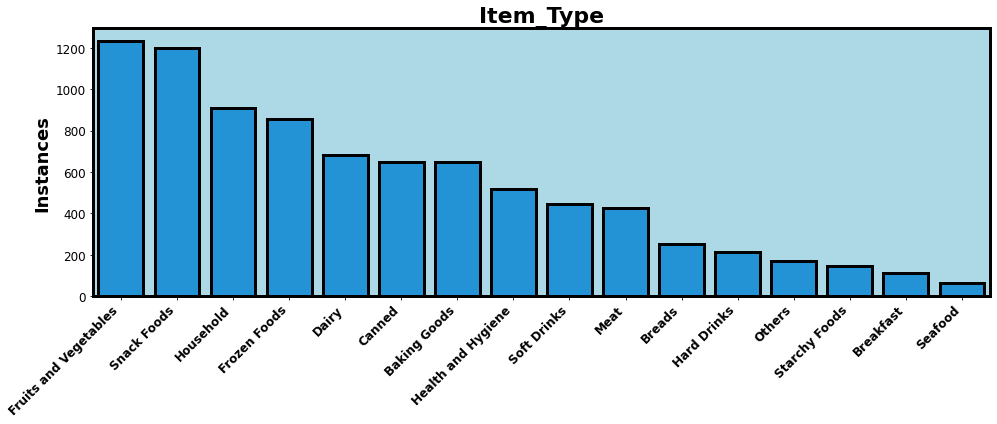

In [69]:
categories = ['Fruits and Vegetables', 'Snack Foods','Household', 'Frozen Foods',
              'Dairy','Canned', 'Baking Goods', 'Health and Hygiene',
              'Soft Drinks', 'Meat', 'Breads', 'Hard Drinks', 'Others',
              'Starchy Foods', 'Breakfast', 'Seafood']

# Utilize function to display count plot
count_plot(eda_df, 'Item_Type', categories, rot=45, fs=(14,6), hza='right')

#### **'Outlet Establishment Year' column**

In [70]:
# Display column statistics
eda_df['Outlet_Establishment_Year'].describe()

count    8523.000000
mean     1997.831867
std         8.371760
min      1985.000000
25%      1987.000000
50%      1999.000000
75%      2004.000000
max      2009.000000
Name: Outlet_Establishment_Year, dtype: float64

In [71]:
# Display supplemental column statistics
column_statistics(eda_df, 'Outlet_Establishment_Year')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 0 (0.0)% high
Unique values: 9
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64


In [72]:
# Display normalzed value counts
eda_df['Outlet_Establishment_Year'].value_counts(normalize=True)

1985    0.171653
1987    0.109351
1999    0.109117
1997    0.109117
2004    0.109117
2002    0.108999
2009    0.108882
2007    0.108647
1998    0.065118
Name: Outlet_Establishment_Year, dtype: float64

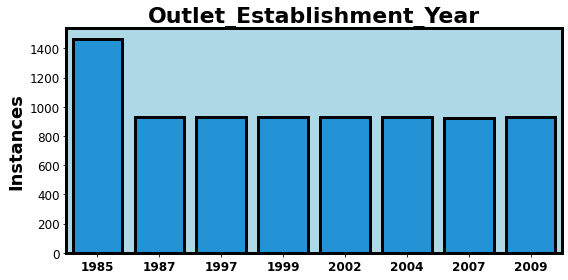

In [73]:
# Utilize function to display count plot
categories = [1985, 1987, 1997, 1999, 2002, 2004, 2007, 2009]
count_plot(eda_df, 'Outlet_Establishment_Year', categories)

#### **'Outlet_Size' column**

In [74]:
# Display column statistics
eda_df['Outlet_Size'].describe()

count       8523
unique         4
top       Medium
freq        2793
Name: Outlet_Size, dtype: object

In [75]:
# Display supplemental column statistics
column_statistics(eda_df, 'Outlet_Size')

Missing Values: 0 (0.0)%
Unique values: 4
Medium     2793
Unknown    2410
Small      2388
High        932
Name: Outlet_Size, dtype: int64


In [76]:
# Display normalzed value counts
eda_df['Outlet_Size'].value_counts(normalize=True)

Medium     0.327702
Unknown    0.282764
Small      0.280183
High       0.109351
Name: Outlet_Size, dtype: float64

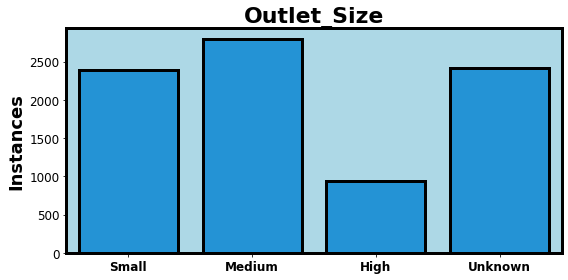

In [77]:
# Utilize function to display count plot
categories = ['Small', 'Medium', 'High', 'Unknown']
count_plot(eda_df, 'Outlet_Size', categories)

#### **'Outlet_Location_Type' column**

In [78]:
# Display column statistics
eda_df['Outlet_Location_Type'].describe()

count       8523
unique         3
top       Tier 3
freq        3350
Name: Outlet_Location_Type, dtype: object

In [79]:
# Display supplemental column statistics
column_statistics(eda_df, 'Outlet_Location_Type')

Missing Values: 0 (0.0)%
Unique values: 3
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


In [80]:
# Display normalzed value counts
eda_df['Outlet_Location_Type'].value_counts(normalize=True)

Tier 3    0.393054
Tier 2    0.326763
Tier 1    0.280183
Name: Outlet_Location_Type, dtype: float64

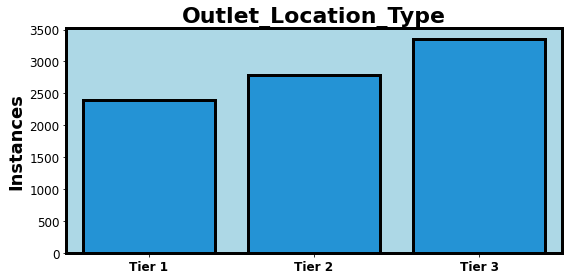

In [81]:
# Utilize function to display count plot
categories = ['Tier 1', 'Tier 2', 'Tier 3']
count_plot(eda_df, 'Outlet_Location_Type', categories)

#### **'Outlet_Type' column**

In [82]:
# Display column statistics
eda_df['Outlet_Type'].describe()

count                  8523
unique                    4
top       Supermarket Type1
freq                   5577
Name: Outlet_Type, dtype: object

In [83]:
# Display supplemental column statistics
column_statistics(eda_df, 'Outlet_Type')

Missing Values: 0 (0.0)%
Unique values: 4
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


In [84]:
# Display normalzed value counts
eda_df['Outlet_Type'].value_counts(normalize=True)

Supermarket Type1    0.654347
Grocery Store        0.127068
Supermarket Type3    0.109703
Supermarket Type2    0.108882
Name: Outlet_Type, dtype: float64

In [85]:
eda_df['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

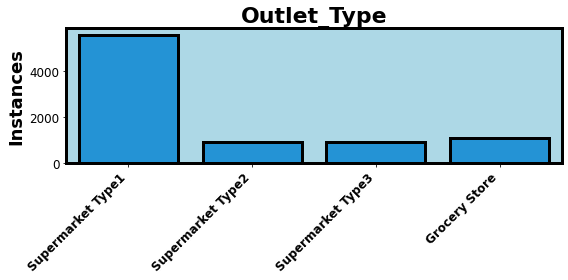

In [86]:
# Utilize function to display count plot
categories = ['Supermarket Type1', 'Supermarket Type2', 'Supermarket Type3', 'Grocery Store']
count_plot(eda_df, 'Outlet_Type', categories, rot=45, hza='right')

### **Numerical Columns**

#### **Summary Statistics**

In [87]:
# Display the descriptive statistics for the numeric columns
eda_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.875314,0.066132,140.992782,1997.831867,2181.288914
std,4.645010,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026989,93.826500,1987.000000,834.247400
50%,12.650000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#### **'Item_Weight' column**

**Statistics**

In [88]:
# Display column statistics
eda_df.Item_Weight.describe()

count    8523.000000
mean       12.875314
std         4.645010
min         4.555000
25%         8.785000
50%        12.650000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [89]:
# Display supplemental column statistics
column_statistics(eda_df, 'Item_Weight')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 0 (0.0)% high
Unique values: 415


**Plots**

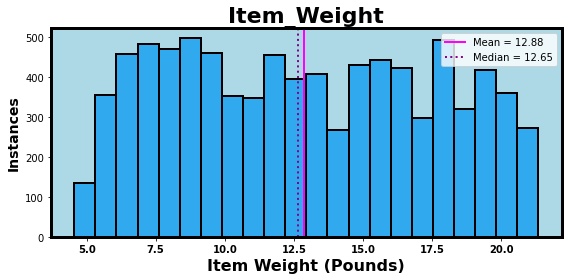

In [90]:
# Utilize function to display histogram plot
hist_plot(eda_df, 'Item_Weight', 'Item Weight (Pounds)', 'auto')

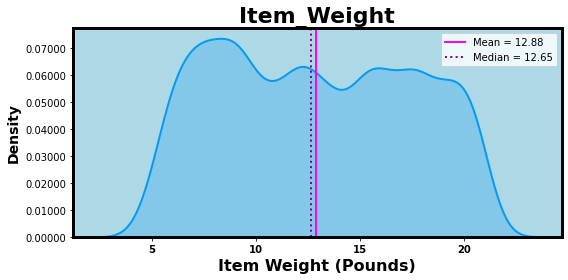

In [91]:
# Utilize function to display a KDE plot
kde_plot(eda_df, 'Item_Weight', 'Item Weight (Pounds)', 'auto')

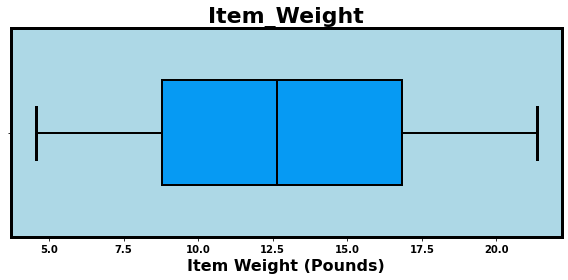

In [92]:
# Utilize function to display histogram plot
box_plot(eda_df, 'Item_Weight', 'Item Weight (Pounds)')

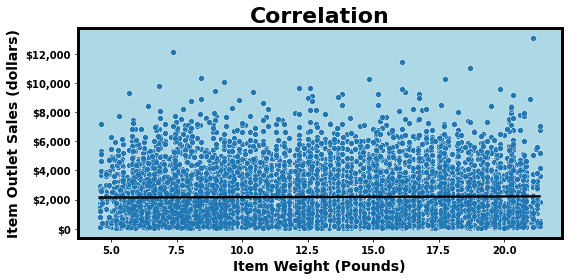

In [93]:
reg_plot(eda_df, 'Item_Weight', 'Item_Outlet_Sales', tit_lab='Correlation', 
         x_lab='Item Weight (Pounds)', y_lab='Item Outlet Sales (dollars)')

**Distribution Description**

- This feature has a continuous distribution.

In [94]:
# Determine if this feature has skew, and if so, which direction (+/-)
# Determine the kurtosis of the feature; Mesokurtic, Leptokurtic, or Platykurtic
# Determine the number of outliers for this feature based on zscore
dist_desc(eda_df, 'Item_Weight')

This feature is positively skewed.
This feature is Platykurtic, because it has kurtosis value of 1.7701820379222473.
This feature has 0 outliers.


#### **'Item_Visibility' column**

**Statistics**

In [95]:
# Display column statistics
eda_df.Item_Visibility.describe()

count    8523.000000
mean        0.066132
std         0.051598
min         0.000000
25%         0.026989
50%         0.053931
75%         0.094585
max         0.328391
Name: Item_Visibility, dtype: float64

In [96]:
# Display supplemental column statistics
column_statistics(eda_df, 'Item_Visibility')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 144 (1.7)% high
Unique values: 7880


**Plots**

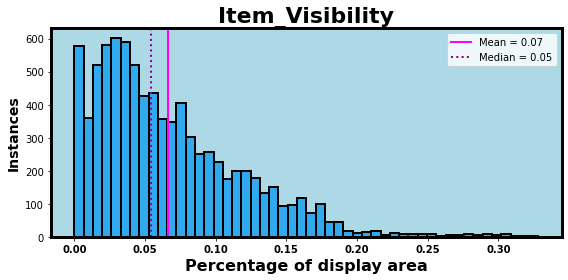

In [97]:
# Utilize function to display histogram plot
hist_plot(eda_df, 'Item_Visibility', 'Percentage of display area', 'auto')

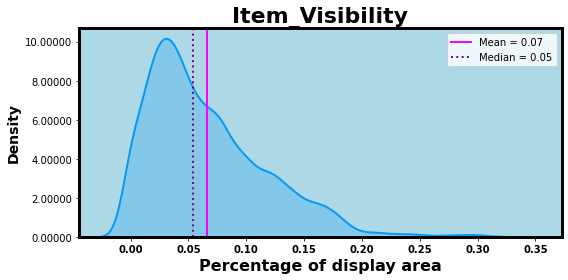

In [98]:
# Utilize function to display a KDE plot
kde_plot(eda_df, 'Item_Visibility', 'Percentage of display area', 'auto')

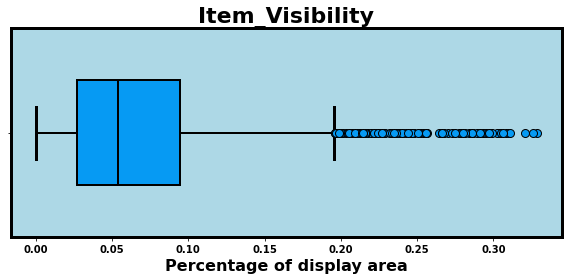

In [99]:
# Utilize function to display histogram plot
box_plot(eda_df, 'Item_Visibility', 'Percentage of display area')

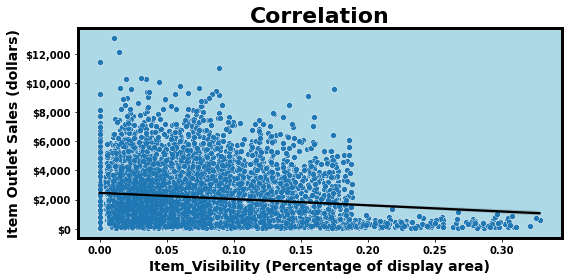

In [100]:
# Utilize function to display regplot 
reg_plot(eda_df, 'Item_Visibility', 'Item_Outlet_Sales', 
         tit_lab='Correlation', 
         x_lab='Item_Visibility (Percentage of display area)', 
         y_lab='Item Outlet Sales (dollars)')

**Distribution Description**

- This feature has a continuous distribution.

In [101]:
# Determine if this feature has skew, and if so, which direction (+/-)
# Determine the kurtosis of the feature; Mesokurtic, Leptokurtic, or Platykurtic
# Determine the number of outliers for this feature based on zscore
dist_desc(eda_df, 'Item_Visibility')

This feature is positively skewed.
This feature is Leptokurtic, because it has kurtosis value of 4.677756506385917
This feature has 95 outliers.


- For EDA, outliers do not need to be removed.
- For Machine Learning, outliers may be removed from the ml_df to determine if it will improve model performance.

#### **'Item_MRP' column**

**Statistics**

In [102]:
# Display column statistics
eda_df.Item_MRP.describe()

count    8523.000000
mean      140.992782
std        62.275067
min        31.290000
25%        93.826500
50%       143.012800
75%       185.643700
max       266.888400
Name: Item_MRP, dtype: float64

In [103]:
# Display supplemental column statistics
column_statistics(eda_df, 'Item_MRP')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 0 (0.0)% high
Unique values: 5938


**Plots**

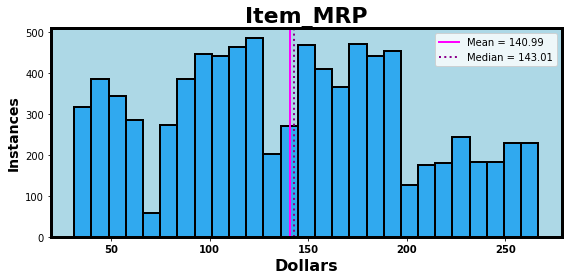

In [104]:
# Utilize function to display histogram plot
hist_plot(eda_df, 'Item_MRP', 'Dollars', 'auto')

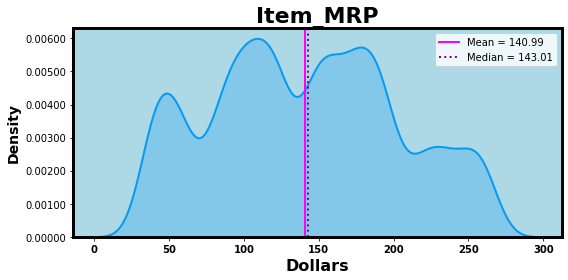

In [105]:
# Utilize function to display a KDE plot
kde_plot(eda_df, 'Item_MRP', 'Dollars', 'auto')

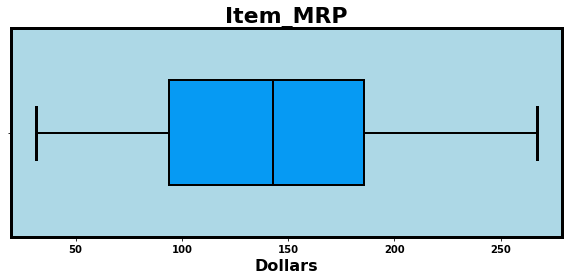

In [106]:
# Utilize function to display histogram plot
box_plot(eda_df, 'Item_MRP', 'Dollars')

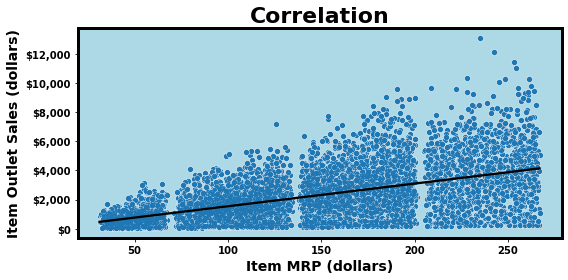

In [107]:
reg_plot(eda_df, 'Item_MRP', 'Item_Outlet_Sales', tit_lab='Correlation', 
         x_lab='Item MRP (dollars)', y_lab='Item Outlet Sales (dollars)')

**Distribution Description**

- This feature has a continuous distribution.

In [108]:
# Determine if this feature has skew, and if so, which direction (+/-)
# Determine the kurtosis of the feature; Mesokurtic, Leptokurtic, or Platykurtic
# Determine the number of outliers for this feature based on zscore
dist_desc(eda_df, 'Item_MRP')

This feature is negatively skewed.
This feature is Platykurtic, because it has kurtosis value of 2.1100489068493395.
This feature has 0 outliers.


#### **'Item_Outlet_Sales' column**

**Statistics**

In [109]:
# Display column statistics
eda_df.Item_Outlet_Sales.describe()

count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

In [110]:
# Display supplemental column statistics
column_statistics(eda_df, 'Item_Outlet_Sales')

Missing Values: 0 (0.0)%
Outliers: 0 (0.0)% low, 186 (2.2)% high
Unique values: 3493


**Plots**

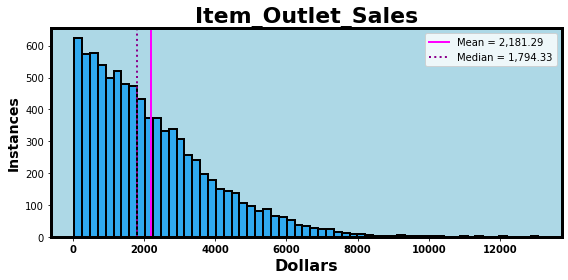

In [111]:
# Utilize function to display histogram plot
hist_plot(eda_df, 'Item_Outlet_Sales', 'Dollars', 'auto')

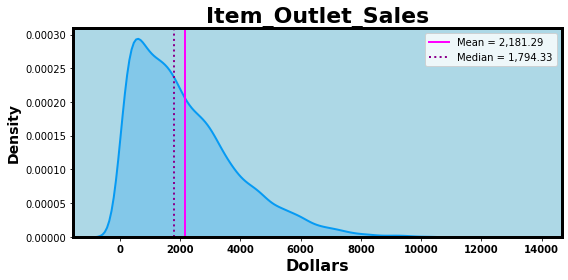

In [112]:
# Utilize function to display a KDE plot
kde_plot(eda_df, 'Item_Outlet_Sales', 'Dollars', 'auto')

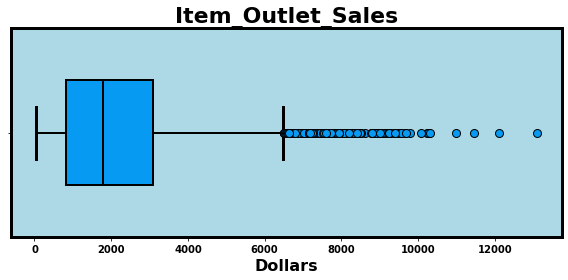

In [113]:
# Utilize function to display histogram plot
box_plot(eda_df, 'Item_Outlet_Sales', 'Dollars')

**Distribution Description**

- This feature has a continuous distribution.

In [114]:
# Determine if this feature has skew, and if so, which direction (+/-)
# Determine the kurtosis of the feature; Mesokurtic, Leptokurtic, or Platykurtic
# Determine the number of outliers for this feature based on zscore
dist_desc(eda_df, 'Item_Outlet_Sales')

This feature is positively skewed.
This feature is Leptokurtic, because it has kurtosis value of 4.614224991590342
This feature has 90 outliers.


- This column is our target column, outliers will not be removed.

### **Feature Correlation**

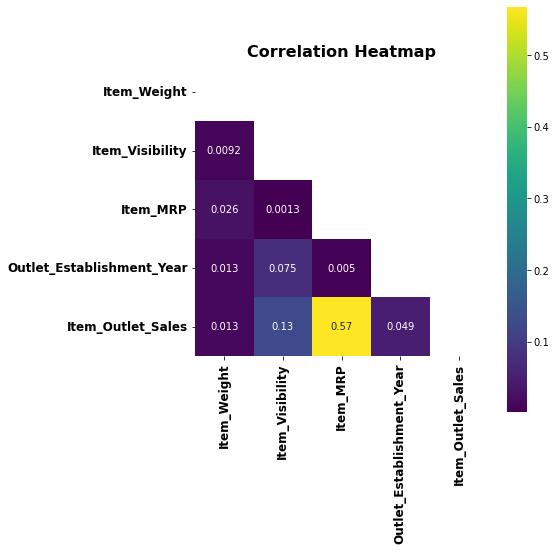

In [115]:
# Plot Correlation Heatmap
plt.figure(figsize = (8,8),facecolor='w')
corr = eda_df.corr().abs()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr,square=True, cmap='viridis', annot=True, mask=mask);
plt.title('Correlation Heatmap', fontsize = 16, weight='bold')
plt.xticks(fontsize = 12, weight='bold', rotation=90)
plt.yticks(fontsize = 12, weight='bold', rotation=0);
plt.tight_layout()
plt.show;

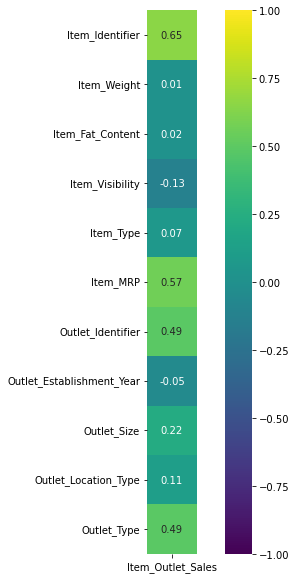

{'corr':                            Item_Outlet_Sales
 Item_Identifier                     0.653482
 Item_Weight                         0.013162
 Item_Fat_Content                    0.018719
 Item_Visibility                    -0.128625
 Item_Type                           0.068843
 Item_MRP                            0.567574
 Outlet_Identifier                   0.490755
 Outlet_Establishment_Year          -0.049135
 Outlet_Size                         0.219439
 Outlet_Location_Type                0.111828
 Outlet_Type                         0.489464,
 'ax': <AxesSubplot:>}

In [116]:
# Calculate the correlation/strength-of-association of features in data-set with 
# both categorical and continuous features using:
# - Pearson's R for continuous-continuous cases
# - Correlation Ratio for categorical-continuous cases 
# - Cramer's V or Theil's U for categorical-categorical cases
associations(eda_df, 
             figsize=(10,10), 
             cmap='viridis', 
             display_columns='Item_Outlet_Sales', 
             hide_rows='Item_Outlet_Sales')

In [117]:
# Create a list of column names in descending order of
# correlation to the target 'Item_Outlet_Sales'
ml_df_columns = ['Item_Identifier',
                 'Item_MRP',
                 'Outlet_Identifier',
                 'Outlet_Type',
                 'Outlet_Size',
                 'Item_Visibility',
                 'Outlet_Location_Type',
                 'Item_Type',
                 'Item_Weight',
                 'Outlet_Establishment_Year',
                 'Item_Fat_Content']

## **Preprocessing for Machine Learning**

### **Validation Split**

In [118]:
# Define features (X) and target (y)
X = ml_df.drop(columns = ['Item_Outlet_Sales'])
y = ml_df['Item_Outlet_Sales']

In [119]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### **Missing Value Imputation**

In [120]:
# Loop through index values of the dataframe
for ind in X_train.index:
    # Create a filter to select the Item_Identifier corresponding to the index
    item_filter = X_train['Item_Identifier'] == X_train.loc[ind,'Item_Identifier']

    # Calculate the rounded value of the mean 'Item_Weight' 
    # of this rows 'Item_Identifier' 
    mean_item_weight = round(X_train.loc[item_filter,'Item_Weight'].mean(), 3)

    # Assign mean_item_weight to the 'Item_Weight' column of this row
    X_train.loc[ind,'Item_Weight'] = mean_item_weight

In [121]:
# Identify any remaining 'Item_Identifier's without 'Item_Weight' for the eda_df
print(X_train.Item_Weight.isnull().sum())
X_train[X_train.Item_Weight.isnull()].head()

20


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7387,NCT53,NaN,Low Fat,0.084245,Health and Hygiene,164.6526,OUT019,1985,Small,Tier 1,Grocery Store
4663,FDT47,NaN,Regular,0.024390,Breads,95.9068,OUT027,1985,Medium,Tier 3,Supermarket Type3
5639,FDZ02,NaN,Regular,0.037963,Dairy,97.5726,OUT027,1985,Medium,Tier 3,Supermarket Type3
8201,FDO03,NaN,Regular,0.036704,Meat,228.1352,OUT027,1985,Medium,Tier 3,Supermarket Type3
446,FDS09,NaN,Regular,0.141975,Snack Foods,49.6008,OUT019,1985,Small,Tier 1,Grocery Store


In [122]:
# Loop through index values of the dataframe
for ind in X_test.index:
    # Create a filter to select the Item_Identifier corresponding to the index
    item_filter = X_train['Item_Identifier'] == X_test.loc[ind,'Item_Identifier']

    # Calculate the rounded value of the mean 'Item_Weight' 
    # of this rows 'Item_Identifier' 
    mean_item_weight = round(X_train.loc[item_filter,'Item_Weight'].mean(), 3)

    # Assign mean_item_weight to the 'Item_Weight' column of this row
    X_test.loc[ind,'Item_Weight'] = mean_item_weight

In [123]:
# Identify any remaining 'Item_Identifier's without 'Item_Weight'
print(X_test.Item_Weight.isnull().sum())
X_test[X_test.Item_Weight.isnull()].head()

57


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
7652,FDS09,NaN,Regular,0.081253,Snack Foods,49.8008,OUT045,2002,Unknown,Tier 2,Supermarket Type1
5840,FDG12,NaN,Regular,0.006352,Baking Goods,120.3098,OUT018,2009,Medium,Tier 3,Supermarket Type2
6186,FDC28,NaN,Low Fat,0.054721,Frozen Foods,107.8254,OUT027,1985,Medium,Tier 3,Supermarket Type3
7643,FDZ31,NaN,Regular,0.113678,Fruits and Vegetables,189.7504,OUT018,2009,Medium,Tier 3,Supermarket Type2
2321,FDA11,NaN,Low Fat,0.043327,Baking Goods,95.6436,OUT045,2002,Unknown,Tier 2,Supermarket Type1


- These remaining missing values will be imputed in the pipeline using SimpleImputer(strategy='median')  

### **Cardinality**

- **The Curse of Dimensionality** - _As the number of features grows, the amount of data needed to accurately be able to distinguish between these features (in order to make a prediction), and generalize our model grows exponentially._
- The 'Item_Identifier' column has 1559 unique values. 
- The high cardinality of this object column feature may adversely impact machine learning model prediction performance and processing times, as well as  exaggerate it's feature importance, and so will be dropped.

In [124]:
# Drop 'Item_Identifier'
X_train = X_train.drop(columns=['Item_Identifier'])
X_test  = X_test.drop(columns=['Item_Identifier'])

### **Linear Regression Model Assumptions**

In [125]:
# Create a second version of X for Linear Regresson models
X_2_train = X_train.copy()
X_2_test  = X_test.copy()

#### **Assumption of Linearity**

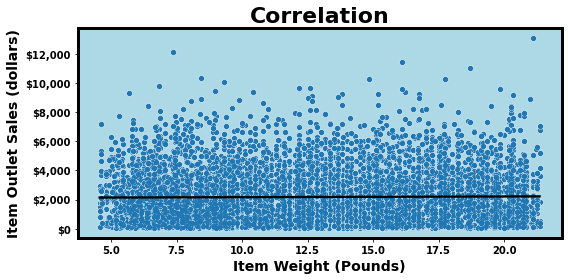

In [126]:
reg_plot(eda_df, 'Item_Weight', 'Item_Outlet_Sales', tit_lab='Correlation', 
         x_lab='Item Weight (Pounds)', y_lab='Item Outlet Sales (dollars)')

- 'Item_Weight', based on the plot above, does not appear to have a linear relationship to the target, 'Item_Outlet_Sales'.
- 'Item_Weight' should not be retained, it should be dropped from the ml_2_df dataframe.

In [127]:
# Drop 'Item_Weight'
X_2_train = X_2_train.drop(columns=['Item_Weight'])
X_2_test  = X_2_test.drop(columns=['Item_Weight'])

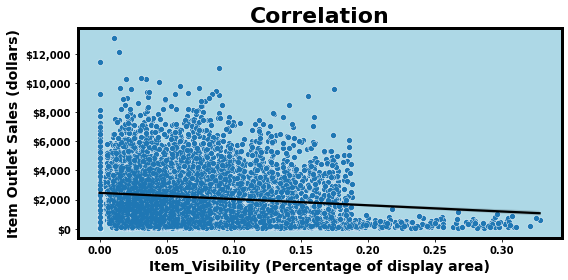

In [128]:
# Utilize function to display regplot 
reg_plot(eda_df, 'Item_Visibility', 'Item_Outlet_Sales', tit_lab='Correlation', 
         x_lab='Item_Visibility (Percentage of display area)', y_lab='Item Outlet Sales (dollars)')

- 'Item_Visibility', based on the plot above, may not have a linear relationship to the target, 'Item_Outlet_Sales', but in fact have two distinct tiers, in which each separately is uncorrelated.

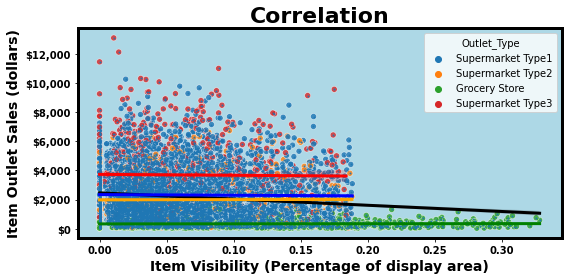

In [129]:
reg_2_plot(eda_df, 'Item_Visibility', 'Item_Outlet_Sales', tit_lab='Correlation', 
         x_lab='Item Visibility (Percentage of display area)', y_lab='Item Outlet Sales (dollars)')

- Based on the plot above 'Item_Visibility' does not appear to have a linear relationship to the target, 'Item_Outlet_Sales'.
- 'Item_Weight' should not be retained, it should be dropped from the ml_2_df dataframe.

In [130]:
# Drop 'Item_Visibility'
X_2_train = X_2_train.drop(columns=['Item_Visibility'])
X_2_test  = X_2_test.drop(columns=['Item_Visibility'])

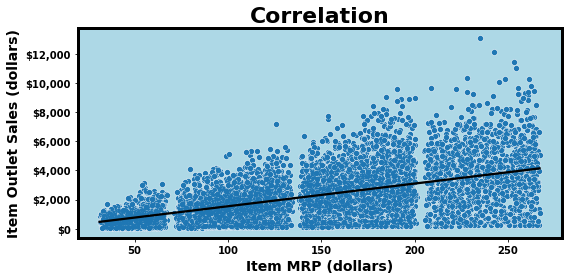

In [131]:
reg_plot(ml_df, 'Item_MRP', 'Item_Outlet_Sales', tit_lab='Correlation', 
         x_lab='Item MRP (dollars)', y_lab='Item Outlet Sales (dollars)')

- 'Item_MRP', based on the plot above, does appear to have a linear relationship to the target, 'Item_Outlet_Sales'.
- 'Item_MRP' should be retained, it should not be dropped from the ml_2_df dataframe.

#### **Assumption of Little-to-No Multicollinearity**

Correlation can be used to identify pairs of features that are too multicollinear to include in the model.
- The threshold utilized will be pairs of features that have a correlation value less then -0.8 or greater than +0.8.


In [132]:
## Calc abs values of correlations
correlation = ml_df.drop(columns='Item_Outlet_Sales').corr().abs()
correlation

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
Item_Weight,1.000000,0.014048,0.027141,0.011588
Item_Visibility,0.014048,1.000000,0.001315,0.074834
Item_MRP,0.027141,0.001315,1.000000,0.005020
Outlet_Establishment_Year,0.011588,0.074834,0.005020,1.000000


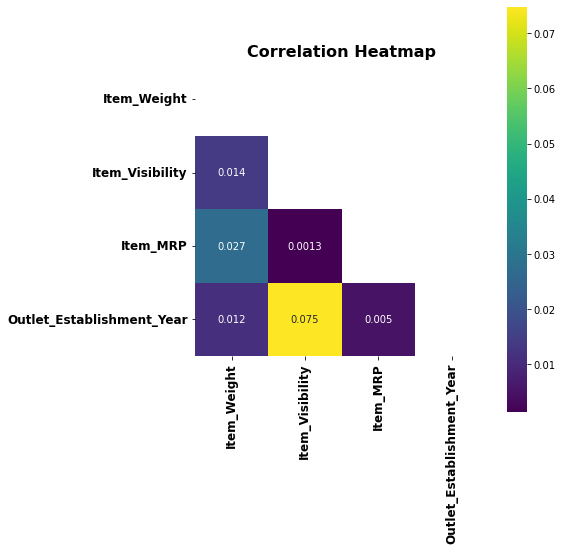

In [133]:
# Plot Correlation Heatmap
plt.figure(figsize = (8,8),facecolor='w')
correlation = ml_df.drop(columns='Item_Outlet_Sales').corr().abs()
mask = np.triu(np.ones_like(correlation))
sns.heatmap(correlation,square=True, cmap='viridis', annot=True, mask=mask);
plt.title('Correlation Heatmap', fontsize = 16, weight='bold')
plt.xticks(fontsize = 12, weight='bold', rotation=90)
plt.yticks(fontsize = 12, weight='bold', rotation=0);
plt.tight_layout()
plt.show;

- The highest correlation noted is 0.075 between 'Item_Visibility' and 'Outlet_Establishment_Year', well below the threshold value value of 0.80. 
- No features need to be dropped based on multicollinearity.

In [134]:
X_train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,Unknown,Tier 2,Supermarket Type1


In [135]:
X_2_train.head()

,Item_Fat_Content,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,Low Fat,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,Regular,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,Regular,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,Low Fat,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,Low Fat,Frozen Foods,120.9098,OUT045,2002,Unknown,Tier 2,Supermarket Type1


### **Instantiate Column Selectors**

In [136]:
# Selectors
cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

# Selectors for low and high cardinality categorical columns
# to differentiate high cardianlity categorical columns
# to analyze dropping or label encoding options
low_unique_cat_selector = [col for col in X_train.columns if X_train[col].dtype=='object' and X_train[col].nunique() < 1500]
high_unique_cat_selector = [col for col in X_train.columns if X_train[col].dtype=='object' and X_train[col].nunique() >= 1500]

In [137]:
# Display categorical column names
cat_selector(X_train)

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [138]:
# Display categorical column names with low number of unique values
low_unique_cat_selector

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [139]:
# Display categorical column names with low number of unique vales
high_unique_cat_selector

[]

In [140]:
# Display numerical column names
num_selector(X_train)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year']

In [141]:
# Display numerical column names
num_selector(X_2_train)

['Item_MRP', 'Outlet_Establishment_Year']

### **Instantiate Transformers**

In [142]:
# Imputers
freq_imputer = SimpleImputer(strategy='most_frequent')
median_imputer = SimpleImputer(strategy='median')
# Scaler
scaler = StandardScaler()
# One Hot Encoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
# Leabel Encoder
lab = LabelEncoder()

### **Instantiate Pipelines**

In [143]:
# Numeric pipeline
numeric_pipe = make_pipeline(median_imputer, scaler)
numeric_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [144]:
# Numeric pipeline without scaling
# This will reduce processing time for -
# Tree based models do not require scaling
numeric_no_scaler_pipe = make_pipeline(median_imputer)
numeric_no_scaler_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median'))])

In [145]:
# Categorical pipeline
categorical_pipe = make_pipeline(freq_imputer, ohe)
categorical_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [146]:
# Categorical pipeline
categorical_low_unique_pipe = make_pipeline(freq_imputer, ohe)
categorical_low_unique_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [147]:
categorical_high_unique_pipe = make_pipeline(freq_imputer, lab)
categorical_high_unique_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('labelencoder', LabelEncoder())])

### **Instantiate ColumnTransformer**

In [148]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
number_no_scaling_tuple = (numeric_no_scaler_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)
categorical_low_unique_tuple = (categorical_low_unique_pipe, low_unique_cat_selector)
categorical_high_unique_tuple = (categorical_high_unique_pipe, high_unique_cat_selector)

In [149]:
# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, 
                                       category_tuple, 
                                       remainder='passthrough')
preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])

In [150]:
# ColumnTransformer without scaling
# - Scaling is not required for tree based models
no_scaling_preprocessor = make_column_transformer(number_no_scaling_tuple, 
                                                  category_tuple, 
                                                  remainder='passthrough')
no_scaling_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])

In [151]:
# ColumnTransformer without scaling or one hot encoding
no_scaling_lab_preprocessor = make_column_transformer(number_no_scaling_tuple, 
                                                  categorical_low_unique_tuple,
                                                  categorical_high_unique_tuple,  
                                                  remainder='passthrough')
no_scaling_lab_preprocessor

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='median'))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Item_Fat_Content', 'Item_Type',
                                  'Outlet_Identifier', 'Outlet_Size',
                                  'Outlet_Location_Type', 'Outlet_Type']),
                                ('pipeline-3',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('labelencoder',
                                                  LabelEncoder())]),
                                 [])])

### **Fit and Transform Data**

In [152]:
# Fit on Train
# Default X_train
preprocessor.fit(X_train)
# Transform Train and Test
# Default X_train and X_test
X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [153]:
# Fit on Train
# Linear regression X_train
preprocessor.fit(X_2_train)
# Transform Train and Test
# Linear regression X_train and X_test
X_2_train_processed = preprocessor.transform(X_2_train)
X_2_test_processed = preprocessor.transform(X_2_test)

In [154]:
# Get out the column transformer steps
preprocessor.named_transformers_

{'pipeline-1': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                 ('standardscaler', StandardScaler())]),
 'pipeline-2': Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse=False))])}

In [155]:
# Reference the pipeline that has the one hot encoder
cat_pipe = preprocessor.named_transformers_['pipeline-2']

In [156]:
# Display the feature names out from the one hot encoder
cat_pipe.named_steps['onehotencoder'].get_feature_names_out(cat_selector(X_train))

array(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Size_Unknown', 'Outlet_Location_Type_Tier 1',
       'Outlet_Location_Type_Tier 2', 'Outlet_Location_Ty

In [157]:
# Extract the feature names from one hot encoder
cat_feature_names = preprocessor.named_transformers_['pipeline-2']\
                            .named_steps['onehotencoder']\
                            .get_feature_names_out(cat_selector(X_train))
cat_feature_names[:20]

array(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads',
       'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy',
       'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
       'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene',
       'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others',
       'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013'],
      dtype=object)

In [158]:
# get final col names which are num features + cat features
# Default X_train and X_test
final_cols = num_selector(X_train) + list(cat_feature_names)
# Linear regression X_train and X_test
final_2_cols = num_selector(X_2_train) + list(cat_feature_names)

In [159]:
final_cols[:10]

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Fat_Content_Low Fat',
 'Item_Fat_Content_Regular',
 'Item_Type_Baking Goods',
 'Item_Type_Breads',
 'Item_Type_Breakfast',
 'Item_Type_Canned']

In [160]:
final_2_cols[:10]

['Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Fat_Content_Low Fat',
 'Item_Fat_Content_Regular',
 'Item_Type_Baking Goods',
 'Item_Type_Breads',
 'Item_Type_Breakfast',
 'Item_Type_Canned',
 'Item_Type_Dairy',
 'Item_Type_Frozen Foods']

### **Inspect the Result**

In [161]:
# Check for missing values and that data is scaled and one-hot encoded
print(f'There are {np.isnan(X_train_processed).sum().sum()} missing values in X_train_processed.')
print(f'There are {np.isnan(X_test_processed).sum().sum()} missing values in X_test_processed.')
print('\n')
print('All data in X_train_processed are', X_train_processed.dtype)
print('All data in X_test_processed are', X_test_processed.dtype)
print('\n')
print('The shape of X_train_processed is', X_train_processed.shape)
print('The shape of X_test_processed is', X_test_processed.shape)

There are 0 missing values in X_train_processed.
There are 0 missing values in X_test_processed.


All data in X_train_processed are float64
All data in X_test_processed are float64


The shape of X_train_processed is (6392, 43)
The shape of X_test_processed is (2131, 43)


In [162]:
# Create dataframes from the processed arrays
# Default X_train and X_test
X_train_df = pd.DataFrame(X_train_processed, columns = final_cols)
X_test_df = pd.DataFrame(X_test_processed, columns = final_cols)
# Linear Regression X_train and X_test
X_2_train_df = pd.DataFrame(X_2_train_processed, columns = final_2_cols)
X_2_test_df = pd.DataFrame(X_2_test_processed, columns = final_2_cols)

In [163]:
X_train_df.describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.0,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00
mean,0.00,-0.00,0.00,-0.00,0.65,0.35,0.07,0.03,0.01,0.08,0.08,0.1,0.15,0.03,0.06,0.11,0.05,0.02,0.01,0.14,0.05,0.02,0.06,0.11,0.11,0.11,0.06,0.11,0.11,0.11,0.11,0.11,0.11,0.33,0.28,0.28,0.27,0.33,0.40,0.12,0.65,0.11,0.11
std,1.00,1.00,1.00,1.00,0.48,0.48,0.26,0.16,0.11,0.26,0.27,0.3,0.36,0.16,0.24,0.31,0.21,0.14,0.08,0.35,0.22,0.14,0.25,0.31,0.31,0.31,0.24,0.32,0.31,0.31,0.31,0.31,0.31,0.47,0.45,0.45,0.45,0.47,0.49,0.33,0.48,0.31,0.32
min,-1.81,-1.29,-1.77,-1.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.88,-0.76,-0.76,-1.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.06,-0.23,0.03,0.14,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.88,0.56,0.72,0.73,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00
max,1.82,5.13,1.99,1.33,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [164]:
X_2_train_df.describe().round(2)

,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Identifier_OUT010,Outlet_Identifier_OUT013,Outlet_Identifier_OUT017,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Identifier_OUT046,Outlet_Identifier_OUT049,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Size_Unknown,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.0,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00,6392.00
mean,0.00,-0.00,0.65,0.35,0.07,0.03,0.01,0.08,0.08,0.1,0.15,0.03,0.06,0.11,0.05,0.02,0.01,0.14,0.05,0.02,0.06,0.11,0.11,0.11,0.06,0.11,0.11,0.11,0.11,0.11,0.11,0.33,0.28,0.28,0.27,0.33,0.40,0.12,0.65,0.11,0.11
std,1.00,1.00,0.48,0.48,0.26,0.16,0.11,0.26,0.27,0.3,0.36,0.16,0.24,0.31,0.21,0.14,0.08,0.35,0.22,0.14,0.25,0.31,0.31,0.31,0.24,0.32,0.31,0.31,0.31,0.31,0.31,0.47,0.45,0.45,0.45,0.47,0.49,0.33,0.48,0.31,0.32
min,-1.77,-1.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.76,-1.29,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,0.03,0.14,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
75%,0.72,0.73,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00,1.00,0.00,0.00
max,1.99,1.33,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.0,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00




---



## **Machine Learning Models**

### **Metric Function**

In [165]:
# Create a dataframe to store model performaance metrics
model_metrics_df =pd.DataFrame()

In [166]:
# Create a function to take the true and predicted values
# and print MAE, MSE, RMSE, and R2 metrics
def evaluation_model(pipe, model_name='', 
                     x_train='X_train', x_test='X_test', params=None):
  # Train
  mae = round(mean_absolute_error(y_train, pipe.predict(x_train)),3)
  model_metrics_df.loc[model_name, 'Train MAE'] = mae
  mse = round(mean_squared_error(y_train, pipe.predict(x_train)),3)
  model_metrics_df.loc[model_name, 'Train MSE'] = mse
  rmse = round(np.sqrt(mean_squared_error(y_train, pipe.predict(x_train))),3)
  model_metrics_df.loc[model_name, 'Train RMSE'] = rmse
  r2 = round(r2_score(y_train, pipe.predict(x_train)),7)
  model_metrics_df.loc[model_name, 'Train R2'] = r2
  print(f'{model_name} Train Scores')
  print(f'MAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.4f}\n')

  # Test
  mae = round(mean_absolute_error(y_test, pipe.predict(x_test)),2)
  model_metrics_df.loc[model_name, 'Test MAE'] = round(mae, 2)
  mse = round(mean_squared_error(y_test, pipe.predict(x_test)),2)
  model_metrics_df.loc[model_name, 'Test MSE'] = round(mse, 2)
  rmse = round(np.sqrt(mean_squared_error(y_test, pipe.predict(x_test))),2)
  model_metrics_df.loc[model_name, 'Test RMSE'] = round(rmse, 2)
  r2 = round(r2_score(y_test, pipe.predict(x_test)),7)
  model_metrics_df.loc[model_name, 'Test R2'] = r2
  print(f'{model_name} Test Scores')
  print(f'MAE: {mae:,.2f} \nMSE: {mse:,.2f} \nRMSE: {rmse:,.2f} \nR2: {r2:.4f}\n')

### **Baseline Model**

In [167]:
# Make an instance of the model
dummy = DummyRegressor(strategy='mean')
# Make a model pipeline
dummy_pipe = make_pipeline(preprocessor, dummy)
# Fit the model
dummy_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                ('dummyregressor', DummyRegressor())])

In [168]:
# Display model performance metrics
evaluation_model(pipe=dummy_pipe, model_name='Dummy Model',
                 x_train=X_train, x_test=X_test)

Dummy Model Train Scores
MAE: 1,360.22 
MSE: 2,959,455.71 
RMSE: 1,720.31 
R2: 0.0000

Dummy Model Test Scores
MAE: 1,326.12 
MSE: 2,772,144.46 
RMSE: 1,664.98 
R2: -0.0048



### **Linear Regression Model**

In [169]:
# Make an instance of the model
lin_reg = LinearRegression(positive=True)
# Make a model pipeline
lin_reg_pipe = make_pipeline(preprocessor, lin_reg)
# Fit the model
lin_reg_pipe.fit(X_2_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                ('linearregression', LinearRegression(positive=True))])

In [170]:
# Display model performance metrics
evaluation_model(pipe=lin_reg_pipe, 
                 model_name='Linear Regression Model', 
                 x_train=X_2_train,
                 x_test=X_2_test)

Linear Regression Model Train Scores
MAE: 847.34 
MSE: 1,298,045.43 
RMSE: 1,139.32 
R2: 0.5614

Linear Regression Model Test Scores
MAE: 803.35 
MSE: 1,193,601.25 
RMSE: 1,092.52 
R2: 0.5674



#### **Assumption of Normality**

In [171]:
# Calculate the residual errors
train_residuals = y_test - lin_reg_pipe.predict(X_2_test)
test_residuals = y_test - lin_reg_pipe.predict(X_2_test)

In [172]:
# Display the first 10 residuals for 
test_residuals[0:10]

7503     394.287902
2957    -360.117995
7031    -498.802411
1084    1546.576587
856     -960.344905
4304     266.011839
2132    -176.231102
1385     371.471592
5239     560.384188
6516    -856.367460
Name: Item_Outlet_Sales, dtype: float64

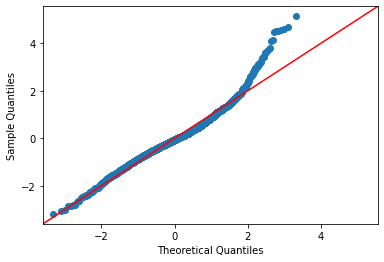

In [173]:
# Display a QQ Plot
sm.graphics.qqplot(test_residuals, line='45', fit=True);

On the qqplot above: the distribution of our residuals is plotted on the y-axis and a perfect normal distribution is plotting on the x-axis.

- If we had a perfect normal distribution, our residuals would be equal to the theoretical values.
the red diagonal line shows the values we would expect if our residuals were normal.
- The further the markers deviate from the red line, the more we are violating the assumption of normality.

#### **Assumption of Homoscedasticity**

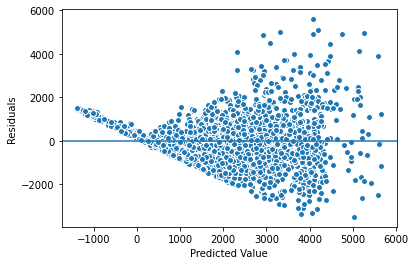

In [174]:
fig, ax = plt.subplots()
ax.scatter(lin_reg_pipe.predict(X_2_test), test_residuals, ec='white', lw=1)
ax.axhline(0)
ax.set(ylabel='Residuals',xlabel='Predicted Value');

### **Linear Regression with Elastic Net Model**

In [175]:
# Make an instance of the model
el_net_reg = ElasticNet(positive=True, random_state=42)
# Make a model pipeline
el_net_reg_pipe = make_pipeline(preprocessor, el_net_reg)
# Fit the model
el_net_reg_pipe.fit(X_2_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                ('elasticnet', ElasticNet(positive=True, random_state=42))])

In [176]:
# Display model performance metrics
evaluation_model(pipe=el_net_reg_pipe, 
                 model_name='Linear Regression with Elastic Net Model', 
                 x_train=X_2_train,
                 x_test=X_2_test)

Linear Regression with Elastic Net Model Train Scores
MAE: 1,031.44 
MSE: 1,861,579.89 
RMSE: 1,364.40 
R2: 0.3710

Linear Regression with Elastic Net Model Test Scores
MAE: 993.19 
MSE: 1,719,423.12 
RMSE: 1,311.27 
R2: 0.3768



In [177]:
# Looking at options for tuning this model
el_net_reg.get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'normalize': 'deprecated',
 'positive': True,
 'precompute': False,
 'random_state': 42,
 'selection': 'cyclic',
 'tol': 0.0001,
 'warm_start': False}

In [178]:
# Create dictionary of hyperparamters to test
param_grid = {'elasticnet__alpha': [2.0, 2.25, 2.5, 2.75, 3],
              'elasticnet__l1_ratio': [0.98, 0.99, 1],
              'elasticnet__max_iter': [100000]}        

In [179]:
# Make an instance of the model
grid_pipe = GridSearchCV(el_net_reg_pipe, param_grid)

In [180]:
# Fit the model
grid_pipe.fit(X_2_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                                       ('elasticnet',
                                        ElasticNet(positive=True,
                                                   random_state=42))]),
             param_grid={'elasticnet__alpha': [2.0, 2.25, 2.5, 2.75, 3],
                         'elasticnet__l1_ratio': [0.98, 0.99, 1],
                         'elasticnet__max_iter': [100000]})

In [181]:
grid_pipe.best_params_

{'elasticnet__alpha': 2.5,
 'elasticnet__l1_ratio': 1,
 'elasticnet__max_iter': 100000}

In [182]:
el_net_reg_pipe = grid_pipe.best_estimator_

In [183]:
# Display model performance metrics
evaluation_model(pipe=el_net_reg_pipe, 
                 model_name='Linear Regression with Elastic Net Model', 
                 x_train=X_2_train,
                 x_test=X_2_test)

Linear Regression with Elastic Net Model Train Scores
MAE: 847.61 
MSE: 1,301,037.15 
RMSE: 1,140.63 
R2: 0.5604

Linear Regression with Elastic Net Model Test Scores
MAE: 800.69 
MSE: 1,185,707.63 
RMSE: 1,088.90 
R2: 0.5702



#### **Assumption of Normality**

In [184]:
# Calculate the residual errors
residuals = y_test - el_net_reg_pipe.predict(X_2_test)

In [185]:
# Display the first 10 residuals
residuals[0:10]

7503     413.709007
2957    -323.739209
7031    -490.356204
1084    1548.063768
856     -930.071294
4304     199.543728
2132    -125.335718
1385     386.817022
5239     580.833708
6516    -823.145405
Name: Item_Outlet_Sales, dtype: float64

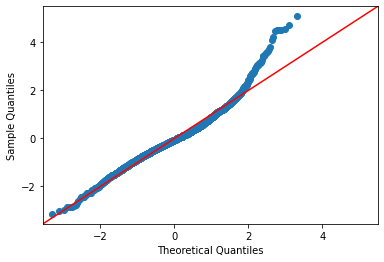

In [186]:
# Display a QQ Plot
sm.graphics.qqplot(residuals, line='45', fit=True);

On the qqplot above: the distribution of our residuals is plotted on the y-axis and a perfect normal distribution is plotting on the x-axis.

- If we had a perfect normal distribution, our residuals would be equal to the theoretical values.
the red diagonal line shows the values we would expect if our residuals were normal.
- The further the markers deviate from the red line, the more we are violating the assumption of normality.

#### **Assumption of Homoscedasticity**

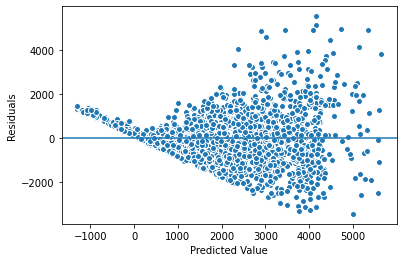

In [187]:
fig, ax = plt.subplots()
ax.scatter(el_net_reg_pipe.predict(X_2_test), residuals, ec='white', lw=1)
ax.axhline(0)
ax.set(ylabel='Residuals', xlabel='Predicted Value');

### **Decision Tree Model**

#### **Version 1**

- Version 1 utilizes the default preprocessing pipeline.

In [188]:
# Make an instance of the model
dec_tree = DecisionTreeRegressor(random_state = 42)
# Make a model pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
# Fit the model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [189]:
# Display model performance metrics
evaluation_model(pipe=dec_tree_pipe, model_name='Decision Tree Model V1',
                 x_train=X_train, x_test=X_test)

Decision Tree Model V1 Train Scores
MAE: 0.00 
MSE: 0.00 
RMSE: 0.00 
R2: 1.0000

Decision Tree Model V1 Test Scores
MAE: 1,034.76 
MSE: 2,242,874.10 
RMSE: 1,497.62 
R2: 0.1871



- The default decision tree had a much higher R2 score on the training data than it did on the test data.  
- This is an indication that there is extremely high variance and the model is overfit.  

In [190]:
# Looking at options for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [191]:
# Display the default model depth
dec_tree.get_depth()

40

In [192]:
# Display the default model number of leaves
dec_tree.get_n_leaves()

6272

In [193]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 20)) # will try every value between 2 and 20
# List to store the score for each value of max_depth:
train_r2 = []
test_r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
    dec_tree_pipe.fit(X_train, y_train)
    train_score = dec_tree_pipe.score(X_train, y_train)
    test_score = dec_tree_pipe.score(X_test, y_test)
    train_r2.append(train_score)
    test_r2.append(test_score)

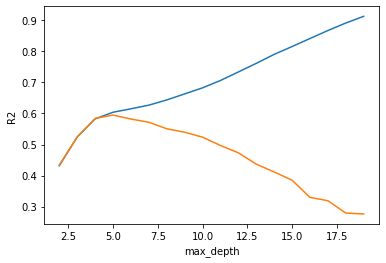

In [194]:
# Visualize the max_depths to display which achieves the highest R2 score
plt.plot(max_depth_range, train_r2)
plt.plot(max_depth_range, test_r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

- From the image above, it appears the highest R2 score for the model is achieved when the hyperparameter max_depth equals 5.  

In [195]:
# Make an instance of the model
dec_tree = DecisionTreeRegressor(max_depth=5, random_state = 42)
# Make a model pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
# Fit the model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [196]:
# Display model performance metrics
evaluation_model(pipe=dec_tree_pipe, model_name='Decision Tree Model V1',
                 x_train=X_train, x_test=X_test)

Decision Tree Model V1 Train Scores
MAE: 762.77 
MSE: 1,172,212.98 
RMSE: 1,082.69 
R2: 0.6039

Decision Tree Model V1 Test Scores
MAE: 738.02 
MSE: 1,117,511.96 
RMSE: 1,057.12 
R2: 0.5950



In [197]:
# Make an instance of the model
dec_tree = DecisionTreeRegressor(random_state = 42)
# Make a model pipeline
dec_tree_pipe = make_pipeline(preprocessor, dec_tree)
# Fit the model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [198]:
# Create dictionary of hyperparamters to test
param_grid = {'decisiontreeregressor__max_depth': range(4,8),
              'decisiontreeregressor__min_samples_leaf': range(45,60),
              'decisiontreeregressor__min_samples_split': range(2,4)}        

In [199]:
# Make an instance of the model
grid_pipe = GridSearchCV(dec_tree_pipe, param_grid)

In [200]:
# Fit the model
grid_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'decisiontreeregressor__max_depth': range(4, 8),
                         'decisiontreeregressor__min_samples_leaf': range(45, 60),
                         'decisiontreeregressor__min_samples_split': range(2, 4)})

In [201]:
grid_pipe.best_params_

{'decisiontreeregressor__max_depth': 6,
 'decisiontreeregressor__min_samples_leaf': 51,
 'decisiontreeregressor__min_samples_split': 2}

In [202]:
dec_tree_pipe = grid_pipe.best_estimator_

In [203]:
# Display model performance metrics
evaluation_model(pipe=dec_tree_pipe, model_name='Decision Tree Model V1',
                 x_train=X_train, x_test=X_test)

Decision Tree Model V1 Train Scores
MAE: 755.24 
MSE: 1,156,448.18 
RMSE: 1,075.38 
R2: 0.6092

Decision Tree Model V1 Test Scores
MAE: 733.98 
MSE: 1,113,815.27 
RMSE: 1,055.37 
R2: 0.5963



#### **Version 2**


- In Version 2, scaling is removed from the preprocessing pipeline to demonstrate that scaling does not affect the performance of tree based models.

In [204]:
# Make an instance of the model
dec_tree = DecisionTreeRegressor(random_state = 42)
# Make a model pipeline
dec_tree_pipe = make_pipeline(no_scaling_preprocessor, dec_tree)
# Fit the model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [205]:
# Display model performance metrics
evaluation_model(pipe=dec_tree_pipe, model_name='Decision Tree Model V2',
                 x_train=X_train, x_test=X_test)

Decision Tree Model V2 Train Scores
MAE: 0.00 
MSE: 0.00 
RMSE: 0.00 
R2: 1.0000

Decision Tree Model V2 Test Scores
MAE: 1,035.03 
MSE: 2,243,212.02 
RMSE: 1,497.74 
R2: 0.1869



- The default decision tree had a much higher R2 score on the training data than it did on the test data.  
- This is an indication that there is extremely high variance and the model is overfit.  

In [206]:
# Looking at options for tuning this model
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [207]:
# Display the default model depth
dec_tree.get_depth()

40

In [208]:
# Display the default model number of leaves
dec_tree.get_n_leaves()

6272

In [209]:
# List of values to try for max_depth:
max_depth_range = list(range(2, 20)) # will try every value between 2 and 20
# List to store the score for each value of max_depth:
train_r2 = []
test_r2 = []
for depth in max_depth_range:
    dec_tree = DecisionTreeRegressor(max_depth = depth, 
                             random_state = 42)
    dec_tree_pipe = make_pipeline(no_scaling_preprocessor, dec_tree)
    dec_tree_pipe.fit(X_train, y_train)
    train_score = dec_tree_pipe.score(X_train, y_train)
    test_score = dec_tree_pipe.score(X_test, y_test)
    train_r2.append(train_score)
    test_r2.append(test_score)

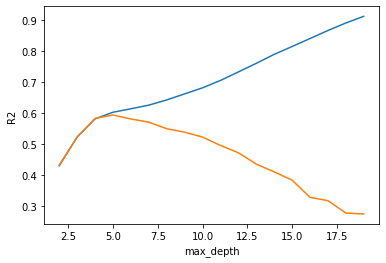

In [210]:
# Visualize the max_depths to display which achieves the highest R2 score
plt.plot(max_depth_range, train_r2)
plt.plot(max_depth_range, test_r2)
plt.xlabel('max_depth')
plt.ylabel('R2');

- From the image above, it appears the highest R2 score for the model is achieved when the hyperparameter max_depth equals 5.  

In [211]:
# Make an instance of the model
dec_tree = DecisionTreeRegressor(max_depth=5, random_state = 42)
# Make a model pipeline
dec_tree_pipe = make_pipeline(no_scaling_preprocessor, dec_tree)
# Fit the model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [212]:
# Display model performance metrics
evaluation_model(pipe=dec_tree_pipe, model_name='Decision Tree Model V2',
                 x_train=X_train, x_test=X_test)

Decision Tree Model V2 Train Scores
MAE: 762.77 
MSE: 1,172,212.98 
RMSE: 1,082.69 
R2: 0.6039

Decision Tree Model V2 Test Scores
MAE: 738.02 
MSE: 1,117,511.96 
RMSE: 1,057.12 
R2: 0.5950



In [213]:
# Make an instance of the model
dec_tree = DecisionTreeRegressor(random_state = 42)
# Make a model pipeline
dec_tree_pipe = make_pipeline(no_scaling_preprocessor, dec_tree)
# Fit the model
dec_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [214]:
# Create dictionary of hyperparamters to test
param_grid = {'decisiontreeregressor__max_depth': range(4,8),
              'decisiontreeregressor__min_samples_leaf': range(45,60),
              'decisiontreeregressor__min_samples_split': range(2,4)}       

In [215]:
# Make an instance of the model
grid_pipe = GridSearchCV(dec_tree_pipe, param_grid)

In [216]:
# Fit the model
grid_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(stra...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                                       ('decisiontreeregressor',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'decisiontreeregressor__max_depth': range(4, 8),
                         'decisiontreeregressor__min_samples_leaf': range(45, 60),
                         'decisiontreeregressor__min_samples_split': range(2, 4)})

In [217]:
grid_pipe.best_params_

{'decisiontreeregressor__max_depth': 6,
 'decisiontreeregressor__min_samples_leaf': 51,
 'decisiontreeregressor__min_samples_split': 2}

In [218]:
dec_tree_pipe = grid_pipe.best_estimator_

In [219]:
# Display model performance metrics
evaluation_model(pipe=dec_tree_pipe, model_name='Decision Tree Model V2',
                 x_train=X_train, x_test=X_test)

Decision Tree Model V2 Train Scores
MAE: 755.24 
MSE: 1,156,448.18 
RMSE: 1,075.38 
R2: 0.6092

Decision Tree Model V2 Test Scores
MAE: 733.98 
MSE: 1,113,815.27 
RMSE: 1,055.37 
R2: 0.5963



- Version 1 with scaling, and Version 2 without scaling achieved identical results.
- This demonstrates that scaling is not only not required for tree based models, if provides not benefit to model performance.

### **Bagged Tree Model**

#### **Version 1**

In [220]:
# Make an instance of the model
bag_tree = BaggingRegressor(random_state = 42)
# Make a model pipeline
bag_tree_pipe = make_pipeline(no_scaling_preprocessor, bag_tree)
# Fit the model
bag_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                ('baggingregressor', BaggingRegressor(random_state=42))])

In [221]:
# Display model performance metrics
evaluation_model(pipe=bag_tree_pipe, model_name='Bagged Tree Model',
                 x_train=X_train, x_test=X_test)

Bagged Tree Model Train Scores
MAE: 320.80 
MSE: 243,086.19 
RMSE: 493.04 
R2: 0.9179

Bagged Tree Model Test Scores
MAE: 782.57 
MSE: 1,274,904.15 
RMSE: 1,129.12 
R2: 0.5379



In [222]:
# Look at the hyperparameters
bag_tree.get_params()

{'base_estimator': None,
 'bootstrap': True,
 'bootstrap_features': False,
 'max_features': 1.0,
 'max_samples': 1.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [223]:
# List of estimator values
estimators = [130, 140, 145, 150, 155, 160, 165, 170]
# Data frame to store the scores
scores = pd.DataFrame(index=estimators, columns=['Train Score', 'Test Score'])
# Iterate through the values to find the best number of estimators
for num_estimators in estimators:
   bag_tree = BaggingRegressor(n_estimators=num_estimators, random_state=42)
   bag_tree_pipe = make_pipeline(no_scaling_preprocessor, bag_tree)
   bag_tree_pipe.fit(X_train, y_train)
   train_score = bag_tree_pipe.score(X_train, y_train)
   test_score = bag_tree_pipe.score(X_test, y_test)
   scores.loc[num_estimators, 'Train Score'] = train_score
   scores.loc[num_estimators, 'Test Score'] = test_score


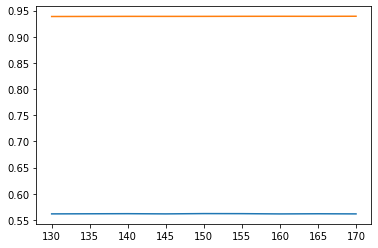

In [224]:
# Plot the scores
plt.plot(scores['Test Score'])
plt.plot(scores['Train Score'])
plt.show()

In [225]:
# Sort by test score
scores = scores.sort_values(by='Test Score', ascending=False)
scores.head(10)

,Train Score,Test Score
150,0.93896,0.562241
155,0.939072,0.562126
140,0.938965,0.562071
165,0.939055,0.561917
130,0.938697,0.5617
145,0.938925,0.561691
170,0.939201,0.561672
160,0.939117,0.561624


In [226]:
# Make an instance of the model
bag_tree = BaggingRegressor(n_estimators=140, random_state = 42)
# Make a model pipeline
bag_tree_pipe = make_pipeline(no_scaling_preprocessor, bag_tree)
# Fit the model
bag_tree_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                ('baggingregressor',
                 BaggingRegressor(n_estimators=140, random_state=42))])

In [227]:
# Display model performance metrics
evaluation_model(pipe=bag_tree_pipe, model_name='Bagged Tree Model',
                 x_train=X_train, x_test=X_test)

Bagged Tree Model Train Scores
MAE: 296.16 
MSE: 180,629.38 
RMSE: 425.00 
R2: 0.9390

Bagged Tree Model Test Scores
MAE: 762.34 
MSE: 1,208,235.26 
RMSE: 1,099.20 
R2: 0.5621



In [228]:
# Create dictionary of hyperparamters to test
param_grid = {'baggingregressor__n_estimators': range(120,160,5)}

In [229]:
# Make an instance of the model
grid_pipe = GridSearchCV(bag_tree_pipe, param_grid)

In [230]:
# Fit the model
grid_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                                       ('baggingregressor',
                                        BaggingRegressor(n_estimators=140,
                                                         random_state=42))]),
             param_grid={'baggingregressor__n_estimators': range(120, 160, 5)})

In [231]:
grid_pipe.best_params_

{'baggingregressor__n_estimators': 140}

In [232]:
bag_tree_pipe = grid_pipe.best_estimator_

In [233]:
# Display model performance metrics
evaluation_model(pipe=bag_tree_pipe, model_name='Bagged Tree Model',
                 x_train=X_train, x_test=X_test)

Bagged Tree Model Train Scores
MAE: 296.16 
MSE: 180,629.38 
RMSE: 425.00 
R2: 0.9390

Bagged Tree Model Test Scores
MAE: 762.34 
MSE: 1,208,235.26 
RMSE: 1,099.20 
R2: 0.5621



### **Support Vector Machine Regression Model**

In [234]:
# Make an instance of the model
sup_vec_mac_reg = LinearSVR(random_state=42)
# Make a model pipeline
sup_vec_mac_reg_pipe = make_pipeline(preprocessor, sup_vec_mac_reg)
# Fit the model
sup_vec_mac_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                ('linearsvr', LinearSVR(random_state=42))])

In [235]:
# Display model performance metrics
evaluation_model(pipe=sup_vec_mac_reg_pipe, 
                 model_name='Support Vector Machine Regression Model',
                 x_train=X_train, x_test=X_test)

Support Vector Machine Regression Model Train Scores
MAE: 897.88 
MSE: 1,679,874.98 
RMSE: 1,296.10 
R2: 0.4324

Support Vector Machine Regression Model Test Scores
MAE: 852.33 
MSE: 1,507,288.08 
RMSE: 1,227.72 
R2: 0.4537



In [236]:
# Looking at options for tuning this model
sup_vec_mac_reg.get_params()

{'C': 1.0,
 'dual': True,
 'epsilon': 0.0,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'loss': 'epsilon_insensitive',
 'max_iter': 1000,
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [237]:
# Create dictionary of hyperparamters to test
param_grid = {'linearsvr__C': [1500, 1600, 1700, 1800, 1900, 2000],
              'linearsvr__max_iter': [1000000],
              'linearsvr__tol': [0.0001, 0.001, 0.01, .1]}

In [238]:
# Make an instance of the model
grid_pipe = GridSearchCV(sup_vec_mac_reg_pipe, param_grid)

In [239]:
# Fit the model
grid_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                                       ('linearsvr',
                                        LinearSVR(random_state=42))]),
             param_grid={'linearsvr__C': [1500, 1600, 1700, 1800, 1900, 2000],
                         'linearsvr__max_iter': [1000000],
                         'linearsvr__tol': [0.0001, 0.001, 0.01, 0.1]})

In [240]:
grid_pipe.best_params_

{'linearsvr__C': 1800, 'linearsvr__max_iter': 1000000, 'linearsvr__tol': 0.001}

In [241]:
las_reg_pipe = grid_pipe.best_estimator_

In [242]:
# Display model performance metrics
evaluation_model(pipe=sup_vec_mac_reg_pipe, 
                 model_name='Support Vector Machine Regression Model',
                 x_train=X_train, x_test=X_test)

Support Vector Machine Regression Model Train Scores
MAE: 897.88 
MSE: 1,679,874.98 
RMSE: 1,296.10 
R2: 0.4324

Support Vector Machine Regression Model Test Scores
MAE: 852.33 
MSE: 1,507,288.08 
RMSE: 1,227.72 
R2: 0.4537



### **K Nearest Neighbors Model**

In [243]:
# Make an instance of the model
knn = KNeighborsRegressor()
# Make a model pipeline
knn_pipe = make_pipeline(preprocessor, knn)
# Fit the model
knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                ('kneighborsregressor', KNeighborsRegressor())])

In [244]:
# Display model performance metrics
evaluation_model(pipe=knn_pipe, model_name='K Nearest Neighbors Model',
                 x_train=X_train, x_test=X_test)

K Nearest Neighbors Model Train Scores
MAE: 718.00 
MSE: 1,002,206.78 
RMSE: 1,001.10 
R2: 0.6614

K Nearest Neighbors Model Test Scores
MAE: 840.12 
MSE: 1,395,813.45 
RMSE: 1,181.45 
R2: 0.4941



In [245]:
# Look at the hyperparameters
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [246]:
# Create dictionary of hyperparamters to test
param_grid = {'kneighborsregressor__n_neighbors': range(25,35),
              'kneighborsregressor__leaf_size': range(2,5)}

In [247]:
# Make an instance of the model
grid_pipe = GridSearchCV(knn_pipe, param_grid)

In [248]:
# Fit the model
grid_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                                       ('kneighborsregressor',
                                        KNeighborsRegressor())]),
             param_grid={'kneighborsregressor__leaf_size': range(2, 5),
                         'kneighborsregressor__n_neighbors': range(25, 35)})

In [249]:
grid_pipe.best_params_

{'kneighborsregressor__leaf_size': 2, 'kneighborsregressor__n_neighbors': 31}

In [250]:
knn_pipe = grid_pipe.best_estimator_

In [251]:
# Display model performance metrics
evaluation_model(pipe=knn_pipe, model_name='K Nearest Neighbors Model',
                 x_train=X_train, x_test=X_test)

K Nearest Neighbors Model Train Scores
MAE: 781.62 
MSE: 1,194,862.18 
RMSE: 1,093.10 
R2: 0.5963

K Nearest Neighbors Model Test Scores
MAE: 754.53 
MSE: 1,135,173.95 
RMSE: 1,065.45 
R2: 0.5886



### **Random Forest Model**

In [252]:
# Make an instance of the model
ran_for = RandomForestRegressor(random_state=42)
# Make a model pipeline
ran_for_pipe = make_pipeline(no_scaling_preprocessor, ran_for)
# Fit the model
ran_for_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [253]:
# Display model performance metrics
evaluation_model(pipe=ran_for_pipe, model_name='Random Forest Model',
                 x_train=X_train, x_test=X_test)

Random Forest Model Train Scores
MAE: 296.50 
MSE: 183,033.43 
RMSE: 427.82 
R2: 0.9382

Random Forest Model Test Scores
MAE: 762.11 
MSE: 1,204,947.64 
RMSE: 1,097.70 
R2: 0.5633



In [254]:
# Looking at some hyperparameters that seem tunable
ran_for.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [255]:
est_depths = [estimator.get_depth() for estimator in ran_for.estimators_]
max(est_depths)

42

In [256]:
depths = range(1, max(est_depths))
scores = pd.DataFrame(index=depths, columns=['Test Score'])
for depth in depths:    
   ran_for = RandomForestRegressor(max_depth=depth, random_state=42)
   ran_for_pipe = make_pipeline(no_scaling_preprocessor, ran_for)
   ran_for_pipe.fit(X_train, y_train)
   scores.loc[depth, 'Train Score'] = ran_for_pipe.score(X_train, y_train)
   scores.loc[depth, 'Test Score'] = ran_for_pipe.score(X_test, y_test)

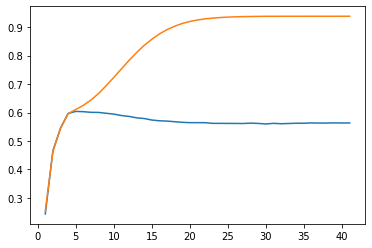

In [257]:
# Plot the scores
plt.plot(scores['Test Score'])
plt.plot(scores['Train Score'])
plt.show()

In [258]:
# Make an instance of the model
ran_for = RandomForestRegressor(max_depth=5, random_state=42)
# Make a model pipeline
ran_for_pipe = make_pipeline(no_scaling_preprocessor, ran_for)
# Fit the model
ran_for_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median'))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                ('randomforestregressor',
                 RandomForestRegressor(max_depth=5, random_state=42))])

In [259]:
# Display model performance metrics
evaluation_model(pipe=ran_for_pipe, model_name='Random Forest Model',
                 x_train=X_train, x_test=X_test)

Random Forest Model Train Scores
MAE: 755.39 
MSE: 1,151,965.40 
RMSE: 1,073.30 
R2: 0.6108

Random Forest Model Test Scores
MAE: 727.69 
MSE: 1,092,841.81 
RMSE: 1,045.39 
R2: 0.6039



In [260]:
# Looking at some hyperparameters that seem tunable
ran_for.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': 5,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [261]:
# Create dictionary of hyperparamters to test
param_grid = {'randomforestregressor__n_estimators': range(80,95),
               'randomforestregressor__max_depth': [4, 5, 6],
               'randomforestregressor__min_samples_split': [2, 3]}

In [262]:
# Make an instance of the model
grid_pipe = GridSearchCV(ran_for_pipe, param_grid)

In [263]:
# Fit the model
grid_pipe.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('pipeline-1',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median'))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                                        ('pipeline-2',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(stra...
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse=False))]),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(max_depth=5,
                                                              random_state=42))]),
             param_grid={'randomforestregressor__max_depth': [4, 5, 6],
                         'randomforestregressor__min_samples_split': [2, 3],
                         'randomforestregressor__n_estimators': range(80, 95)})

In [264]:
grid_pipe.best_params_

{'randomforestregressor__max_depth': 5,
 'randomforestregressor__min_samples_split': 2,
 'randomforestregressor__n_estimators': 86}

In [265]:
ran_for_pipe = grid_pipe.best_estimator_

In [266]:
# Display model performance metrics
evaluation_model(pipe=ran_for_pipe, model_name='Random Forest Model',
                 x_train=X_train, x_test=X_test)

Random Forest Model Train Scores
MAE: 755.25 
MSE: 1,151,838.57 
RMSE: 1,073.24 
R2: 0.6108

Random Forest Model Test Scores
MAE: 727.77 
MSE: 1,093,374.47 
RMSE: 1,045.65 
R2: 0.6037



### **Gradient Boost Model**

In [267]:
# Make an instance of the model
gra_bst_reg = GradientBoostingRegressor()
# Make a model pipeline
gra_bst_reg_pipe = make_pipeline(preprocessor, gra_bst_reg)
# Fit the model
gra_bst_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                ('gradientboostingregressor', GradientBoostingRegressor())])

In [268]:
# Display model performance metrics
evaluation_model(pipe=gra_bst_reg_pipe, 
                 model_name='Gradient Boost Regression Model',
                 x_train=X_train, x_test=X_test)

Gradient Boost Regression Model Train Scores
MAE: 732.09 
MSE: 1,065,630.96 
RMSE: 1,032.29 
R2: 0.6399

Gradient Boost Regression Model Test Scores
MAE: 732.21 
MSE: 1,107,372.02 
RMSE: 1,052.32 
R2: 0.5986



### **Light Gradient Boosted Machine Model**

In [269]:
# Make an instance of the model
lt_gra_bst_reg = LGBMRegressor()
# Make a model pipeline
lt_gra_bst_reg_pipe = make_pipeline(preprocessor, lt_gra_bst_reg)
# Fit the model
lt_gra_bst_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C915095D60>)])),
                ('lgbmregressor', LGBMRegressor())])

In [270]:
# Display model performance metrics
evaluation_model(pipe=lt_gra_bst_reg_pipe, 
                 model_name='Light Gradient Boost Regression Model',
                 x_train=X_train, x_test=X_test)

Light Gradient Boost Regression Model Train Scores
MAE: 642.26 
MSE: 794,445.29 
RMSE: 891.32 
R2: 0.7316

Light Gradient Boost Regression Model Test Scores
MAE: 737.49 
MSE: 1,145,585.64 
RMSE: 1,070.32 
R2: 0.5848



### **Extreme Gradient Boosted Machine Model**

In [271]:
# Make an instance of the model
x_gra_bst_reg = XGBRegressor()
# Make a model pipeline
x_gra_bst_reg_pipe = make_pipeline(preprocessor, x_gra_bst_reg)
# Fit the model
x_gra_bst_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipeline-1',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001C9150953D0>),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   Simpl...
                              gamma=0, gpu_id=-1, grow_policy='depthwise',
                              importance_type=None, interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_to_onehot=4, max_delta_step=0,
                              max_depth=6, max_leaves=0, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=100, n_jobs=0, num_parallel_tree=1,
                              predictor='auto', random_state=0, reg_alpha=0,
                              reg_lambda=1, ...))])

In [272]:
# Display model performance metrics
evaluation_model(pipe=x_gra_bst_reg_pipe, 
                 model_name='eXtreme Gradient Boost Regression Model',
                 x_train=X_train, x_test=X_test)

eXtreme Gradient Boost Regression Model Train Scores
MAE: 468.37 
MSE: 421,154.16 
RMSE: 648.96 
R2: 0.8577

eXtreme Gradient Boost Regression Model Test Scores
MAE: 780.01 
MSE: 1,258,625.40 
RMSE: 1,121.88 
R2: 0.5438



## **Model Performance Comparison**

In [273]:
model_metrics_df = model_metrics_df.drop(index=['Dummy Model'])

In [274]:
model_metrics_df.style.format({"Train MAE":  "${:20,.2f}", 
                               "Train MSE":  "${:20,.2f}", 
                               "Train RMSE": "${:20,.2f}",
                               "Train R2":   "{:.4%}",
                               "Test MAE":   "${:20,.2f}",
                               "Test MSE":   "${:20,.2f}",
                               "Test RMSE":  "${:20,.2f}",
                               "Test R2":    "{:.4%}"})\
                       .background_gradient(cmap='Blues', subset=['Train R2','Test R2'])

,Train MAE,Train MSE,Train RMSE,Train R2,Test MAE,Test MSE,Test RMSE,Test R2
Linear Regression Model,$ 847.34,"$ 1,298,045.43","$ 1,139.32",56.1391%,$ 803.35,"$ 1,193,601.25","$ 1,092.52",56.7376%
Linear Regression with Elastic Net Model,$ 847.61,"$ 1,301,037.15","$ 1,140.63",56.0380%,$ 800.69,"$ 1,185,707.63","$ 1,088.90",57.0237%
Decision Tree Model V1,$ 755.24,"$ 1,156,448.18","$ 1,075.38",60.9236%,$ 733.98,"$ 1,113,815.27","$ 1,055.37",59.6294%
Decision Tree Model V2,$ 755.24,"$ 1,156,448.18","$ 1,075.38",60.9236%,$ 733.98,"$ 1,113,815.27","$ 1,055.37",59.6294%
Bagged Tree Model,$ 296.16,"$ 180,629.38",$ 425.00,93.8965%,$ 762.34,"$ 1,208,235.26","$ 1,099.20",56.2071%
Support Vector Machine Regression Model,$ 897.88,"$ 1,679,874.98","$ 1,296.10",43.2370%,$ 852.33,"$ 1,507,288.08","$ 1,227.72",45.3679%
K Nearest Neighbors Model,$ 781.62,"$ 1,194,862.18","$ 1,093.10",59.6256%,$ 754.53,"$ 1,135,173.95","$ 1,065.45",58.8553%
Random Forest Model,$ 755.25,"$ 1,151,838.57","$ 1,073.24",61.0794%,$ 727.77,"$ 1,093,374.47","$ 1,045.65",60.3703%
Gradient Boost Regression Model,$ 732.09,"$ 1,065,630.96","$ 1,032.29",63.9923%,$ 732.21,"$ 1,107,372.02","$ 1,052.32",59.8630%
Light Gradient Boost Regression Model,$ 642.26,"$ 794,445.29",$ 891.32,73.1557%,$ 737.49,"$ 1,145,585.64","$ 1,070.32",58.4779%


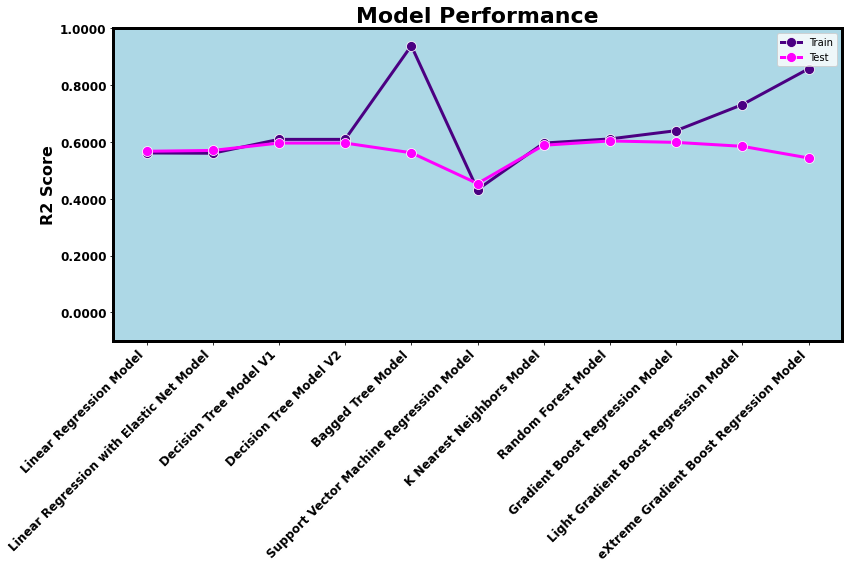

In [275]:
# Display line plot of scores
fig, ax = plt.subplots(nrows=1, figsize=(12,8))
ax.set_facecolor('lightblue')
plt.title('Model Performance', fontsize = 22, weight='bold')

sns.lineplot(data=model_metrics_df['Train R2'], color="indigo", linewidth=3, markersize=10, marker='o', label='Train');
sns.lineplot(data=model_metrics_df['Test R2'], color="magenta", linewidth=3, markersize=10, marker='o', label='Test');

plt.xlabel('', fontsize = 16, weight='bold')
plt.xticks(weight='bold', rotation=45, ha='right')

           
ax.set_ylabel('R2 Score', fontweight='bold', fontsize=16)
plt.yticks(weight='bold')
ax.set_ylim(-.10, 1.0)

ax.tick_params(labelcolor='k', labelsize=12)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3);
    
format = StrMethodFormatter('{x:.4f}') 
ax.yaxis.set_major_formatter(format);

plt.tight_layout()
plt.show;

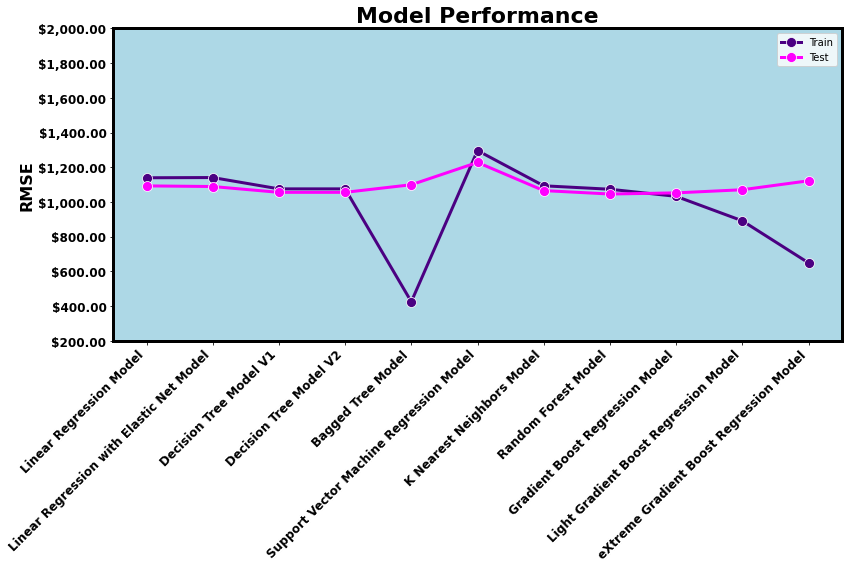

In [276]:
# Display line plot of scores
fig, ax = plt.subplots(nrows=1, figsize=(12,8))
ax.set_facecolor('lightblue')
plt.title('Model Performance', fontsize = 22, weight='bold')

sns.lineplot(data=model_metrics_df['Train RMSE'], color="indigo", linewidth=3, markersize=10, marker='o', label='Train');
sns.lineplot(data=model_metrics_df['Test RMSE'], color="magenta", linewidth=3, markersize=10, marker='o', label='Test');

plt.xlabel('', fontsize = 16, weight='bold')
plt.xticks(weight='bold', rotation=45, ha='right')

ax.set_ylabel('RMSE', fontweight='bold', fontsize=16)
plt.yticks(weight='bold')
ax.set_ylim(200, 2000)

ax.tick_params(labelcolor='k', labelsize=12)

for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(3);
    
format = StrMethodFormatter('${x:,.2f}') 
ax.yaxis.set_major_formatter(format);

plt.tight_layout()
plt.show;

## **Feature Importance**

In [277]:
feature_importance_df = pd.DataFrame(ran_for_pipe.named_steps['randomforestregressor'].feature_importances_,
                                   index = final_cols,  
                                   columns=['Feature Importance']).sort_values('Feature Importance', 
                                   ascending=False)

In [278]:
feature_importance_df.head(50).style.format({"Feature Importance":  "{:.5%}"})

,Feature Importance
Item_MRP,55.27080%
Outlet_Type_Grocery Store,31.31295%
Outlet_Type_Supermarket Type3,5.80970%
Outlet_Identifier_OUT027,4.71888%
Outlet_Establishment_Year,2.26815%
Item_Weight,0.24236%
Item_Visibility,0.17702%
Outlet_Type_Supermarket Type1,0.06019%
Outlet_Identifier_OUT018,0.02317%
Item_Type_Fruits and Vegetables,0.02192%


## **Summary**

## **Reccomendations**

## **To do List**

- Linear Regression Model Assumptions
- EDA
- Boost Model Hypertuning 
- Feature Importance
  - SKLearn Random Forest
  - SKLearn Recursive Feature Elimination
  - SKLearn Select K Best 
- Summary
- Recommendations
- Model Stacking   
- ReadMe
  - write up
  - df to markdown
  - df to png: (https://pypi.org/project/dataframe-image/)
    - import dataframe_image as dfi
    - dfi.export(styled_df, 'filename.png')
  - model metric image plots
- Function Model Metrics Plot
- Functions 
  - utilize **args **kwargs
  